In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import pickle
import os

%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 20})
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

mpl.rcParams['hist.bins'] = 100
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 2.5
mpl.rcParams['grid.alpha'] = 0.2

In [65]:
mpl.rc("figure", facecolor='w', titlesize=14)

In [4]:
pth = '/home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/'

In [5]:
conv = 1e-27*0.389379304 # [GeV*cm^2]<-- conversion factor for xsec[GeV^-2] -> xsec[cm^2]

In [6]:
def read_xsec_from_dat_file(pth, name, ftype = '.dat'):
    
    filename = pth + name + ftype
    print ('reading file: ', filename)
    
    datContent = [i.strip().split() 
                  for i in open(filename).readlines()]
    
    dat_nedges = int(datContent[0][0])
    dat_st_bins = int(datContent[0][2])
    dat_end_bins = int(datContent[0][3])

    dat_lgE_bins = np.linspace(dat_st_bins, dat_end_bins, dat_nedges)
    dat_lgE_bin_centers = dat_lgE_bins[:-1] + (dat_lgE_bins[1] - dat_lgE_bins[0])/2.

    dat_xsec = [float(datContent[i][0]) for i in range(1, len(datContent)-1)]
    dat_xsec = np.array(dat_xsec) * 1.0e-27

    return dat_lgE_bin_centers, dat_xsec

def read_list_xsec_dat_files(pth, names, ftype='.dat'):
    
    d = {}
    for i in range(len(names)):
        name = names[i]
        
        dat_lgE_bin_centers, dat_xsec = read_xsec_from_dat_file(pth, name, ftype=ftype)
        dat_xsec_per_E = dat_xsec/10.**(dat_lgE_bin_centers)
        
        d[name] = {'lgE':dat_lgE_bin_centers, 'xsec':dat_xsec, 'xsec_per_E':dat_xsec_per_E}
        
    return d

In [7]:
pth_csms_dat = '/home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/'
names_csms_dat = ['total_nu_CC_p_NLO_HERAPDF1.5NLO_EIG', 'total_nu_NC_p_NLO_HERAPDF1.5NLO_EIG', 
                  'total_nubar_NC_p_NLO_HERAPDF1.5NLO_EIG', 'total_nubar_CC_p_NLO_HERAPDF1.5NLO_EIG',
                  'total_nu_CC_n_NLO_HERAPDF1.5NLO_EIG', 'total_nu_NC_n_NLO_HERAPDF1.5NLO_EIG', 
                  'total_nubar_NC_n_NLO_HERAPDF1.5NLO_EIG', 'total_nubar_CC_n_NLO_HERAPDF1.5NLO_EIG']

xsec_csms0 = read_list_xsec_dat_files(pth=pth_csms_dat, names=names_csms_dat)

reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nu_CC_p_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nu_NC_p_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nubar_NC_p_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nubar_CC_p_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nu_CC_n_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nu_NC_n_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nubar_NC_n_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nubar_CC_n_NLO_HERAPDF1.5NLO_EIG.dat


In [8]:
xsec_csms0

{'total_nu_CC_p_NLO_HERAPDF1.5NLO_EIG': {'lgE': array([ 1.05,  1.15,  1.25,  1.35,  1.45,  1.55,  1.65,  1.75,  1.85,
          1.95,  2.05,  2.15,  2.25,  2.35,  2.45,  2.55,  2.65,  2.75,
          2.85,  2.95,  3.05,  3.15,  3.25,  3.35,  3.45,  3.55,  3.65,
          3.75,  3.85,  3.95,  4.05,  4.15,  4.25,  4.35,  4.45,  4.55,
          4.65,  4.75,  4.85,  4.95,  5.05,  5.15,  5.25,  5.35,  5.45,
          5.55,  5.65,  5.75,  5.85,  5.95,  6.05,  6.15,  6.25,  6.35,
          6.45,  6.55,  6.65,  6.75,  6.85,  6.95,  7.05,  7.15,  7.25,
          7.35,  7.45,  7.55,  7.65,  7.75,  7.85,  7.95,  8.05,  8.15,
          8.25,  8.35,  8.45,  8.55,  8.65,  8.75,  8.85,  8.95,  9.05,
          9.15,  9.25,  9.35,  9.45,  9.55,  9.65,  9.75,  9.85,  9.95,
         10.05, 10.15, 10.25, 10.35, 10.45, 10.55, 10.65, 10.75, 10.85,
         10.95, 11.05, 11.15, 11.25, 11.35, 11.45, 11.55, 11.65, 11.75,
         11.85, 11.95]),
  'xsec': array([3.19496e-38, 4.28286e-38, 5.67763e-38, 7.45841e-

In [9]:
xsec_csms = {'tgt':[], 'nu':[], 'CC':[], 'lgE':[], 'xsec':[], 'xsec_per_E':[]}

for k in xsec_csms0.keys():
    
        print (k)
    
        st_nu = k.find('total_') +len('total_')
        end_nu = st_nu + k[st_nu:].find('_')
        nustr = k[st_nu:end_nu]
        print (k[st_nu:])
        if nustr == 'nu':
            nu = 1
        elif nustr == 'nubar':
            nu = -1
        else:
            print ('error! nu isnt nu or nubar: ', nustr)
        xsec_csms['nu'].append(nu)
        print (nustr, nu)
        
        st_curr = k.find(nustr+'_') + len(nustr+'_')
        end_curr = st_curr + k[st_curr:].find('_')
        if k[st_curr:end_curr] == 'CC':
            cc = 1
        elif k[st_curr:end_curr] == 'NC':
            cc = 0
        else:
            cc = -1
        xsec_csms['CC'].append(cc)        
        print (k[st_curr:end_curr], cc)
    
        st_tgt = end_curr + 1
        if k[st_tgt] == 'p':
            tgt = 2212
        elif k[st_tgt] == 'n':
            tgt = 2112
        else:
            print ('error! tgt wasnt found correctly: ', k[st_tgt])
        xsec_csms['tgt'].append(tgt)
        print (tgt)

        xsec_csms['lgE'].append(xsec_csms0[k]['lgE'])
        xsec_csms['xsec'].append(xsec_csms0[k]['xsec'])
        xsec_csms['xsec_per_E'].append(xsec_csms0[k]['xsec_per_E'])
        
for k in xsec_csms.keys():
    xsec_csms[k] = np.array(xsec_csms[k])

total_nu_CC_p_NLO_HERAPDF1.5NLO_EIG
nu_CC_p_NLO_HERAPDF1.5NLO_EIG
nu 1
CC 1
2212
total_nu_NC_p_NLO_HERAPDF1.5NLO_EIG
nu_NC_p_NLO_HERAPDF1.5NLO_EIG
nu 1
NC 0
2212
total_nubar_NC_p_NLO_HERAPDF1.5NLO_EIG
nubar_NC_p_NLO_HERAPDF1.5NLO_EIG
nubar -1
NC 0
2212
total_nubar_CC_p_NLO_HERAPDF1.5NLO_EIG
nubar_CC_p_NLO_HERAPDF1.5NLO_EIG
nubar -1
CC 1
2212
total_nu_CC_n_NLO_HERAPDF1.5NLO_EIG
nu_CC_n_NLO_HERAPDF1.5NLO_EIG
nu 1
CC 1
2112
total_nu_NC_n_NLO_HERAPDF1.5NLO_EIG
nu_NC_n_NLO_HERAPDF1.5NLO_EIG
nu 1
NC 0
2112
total_nubar_NC_n_NLO_HERAPDF1.5NLO_EIG
nubar_NC_n_NLO_HERAPDF1.5NLO_EIG
nubar -1
NC 0
2112
total_nubar_CC_n_NLO_HERAPDF1.5NLO_EIG
nubar_CC_n_NLO_HERAPDF1.5NLO_EIG
nubar -1
CC 1
2112


In [10]:
def tgt_by_Npdg(hitN):
    if hitN == 2212:
        return 1000010010
    elif hitN == 2112:
        return 1000000010
    else:
        return 1
    
def get_title(pdg, hitN, CC):
    nuname = {12:'NuE',14:'NuMu',16:'NuTau',
              -12:'NuEBar',-14:'NuMuBar',-16:'NuTauBar'}
    CC_name = {1:'CC',0:'NC'}
    hitN_name = {2212:'protons',2112:'neutrons'}
    
    return nuname[pdg]+' '+CC_name[CC]+': '+hitN_name[hitN]

In [28]:
def plot_ind_v2(ax, filename, pdg=14, hitN=2212, CC=1, linestyle='-'):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    tgt = tgt_by_Npdg(hitN)
        
    ind_base = (genie['tgt']==tgt)*(genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)

    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_base], axis=0)*conv,
            c='red', linestyle=linestyle, label='total: GENIE')
    
    ind_sea = ind_base*(genie['sea']==1)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_sea], axis=0)*conv,
            c='orange', linestyle=linestyle, label='sea: GENIE')
    
    ind_val = ind_base*(genie['sea']==0)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_val], axis=0)*conv,
            c='green', linestyle=linestyle, label='valence: GENIE')
        
    return 0

def plot_ind_hedis(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', linestyle='--'):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    tgt = tgt_by_Npdg(hitN)

    ind_base = (genie['tgt']==tgt)*(genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)
    
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_base], axis=0)*conv,
            c='red', linestyle=linestyle, label='total: '+hedis_model+'(HEDIS)')
    
    ind_sea = ind_base*(genie['sea']==1)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_sea], axis=0)*conv,
            c='orange', linestyle=linestyle, label='sea: '+hedis_model+'(HEDIS)')
    
    ind_val = ind_base*(genie['sea']==0)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_val], axis=0)*conv,
            c='green', linestyle=linestyle, label='valence: '+hedis_model+'(HEDIS)')
    
    return 0

def plot_ind(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det='', linestyle='-'):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    if 'int_hedis' in genie.keys():
        gen = hedis_model+'(HEDIS)'
    else:
        gen = 'GENIE'+genie_det
        
    tgt = tgt_by_Npdg(hitN)

    ind_base = (genie['tgt']==tgt)*(genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)
    
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_base], axis=0)*conv,
            c='red', linestyle=linestyle, label='total: '+gen)
    
    ind_sea = ind_base*(genie['sea']==1)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_sea], axis=0)*conv,
            c='orange', linestyle=linestyle, label='sea: '+gen)
    
    ind_val = ind_base*(genie['sea']==0)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_val], axis=0)*conv,
            c='green', linestyle=linestyle, label='valence: '+gen)
    
    return 0

def plot_ind_q_contr(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det='', linestyle='-'):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    if 'int_hedis' in genie.keys():
        gen = hedis_model+'(HEDIS)'
    else:
        gen = 'GENIE'+genie_det
        
    tgt = tgt_by_Npdg(hitN)

    ind_base = (genie['tgt']==tgt)*(genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)
    
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_base], axis=0)*conv,
            c='red', linestyle=linestyle, label='total: '+gen)
    
    ind_sea = ind_base*(genie['sea']==1)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_sea], axis=0)*conv,
            c='orange', linestyle=linestyle, label='sea: '+gen)
    
    ind_val = ind_base*(genie['sea']==0)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_val], axis=0)*conv,
            c='green', linestyle=linestyle, label='valence: '+gen)
    
    return 0


def plot_def_csms(ax, xsec=xsec_csms, nu=14, hitN=2212, curr=1, linestyle='-'):
    
    nu_sign = int(nu/np.abs(nu))
    
    ind = (xsec['nu']==nu_sign)*\
    (xsec['tgt']==int(hitN))*(xsec['CC']==int(curr))
    
#     print ('nu', nu_sign, 'tgt', int(hitN), 'CC', int(curr), 'ind_base', ind)
#     print (xsec['lgE'][ind][0])
    
    ax.plot(xsec['lgE'][ind][0], xsec['xsec_per_E'][ind][0],
         c='k', linestyle=linestyle, label='CSMS(paper)')
    
    return 0

def plot_ind_ratio_sea_val(ax, filename, pdg=14, hitN=2212, CC=1, 
                           hedis_model='CSMS', genie_det='', linestyle='-'):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    if 'int_hedis' in genie.keys():
        gen = hedis_model+'(HEDIS)'
    else:
        gen = 'GENIE'+genie_det
        
    tgt = tgt_by_Npdg(hitN)

    ind_base = (genie['tgt']==tgt)*(genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)
    
    ind_sea = ind_base*(genie['sea']==1)
    ind_val = ind_base*(genie['sea']==0)
    xsec_val = np.sum(genie['xsec_fits'][ind_val], axis=0)
    xsec_sea = np.sum(genie['xsec_fits'][ind_sea], axis=0)
    ax.plot(np.log10(genie['E_fit']), xsec_sea/xsec_val,
            c='blue', linestyle=linestyle, label='sea: '+gen)
    
    return 0

def plot_both(v2_fname, hedis_fname, pdg=14, hitN=2212, CC=1, hedis_model='CSMS'):
    fig = plt.figure(figsize=(10,8))
    ax = plt.gca()
    
    title = get_title(pdg, hitN, CC)
    ax.set_title('GENIE '+title, fontsize=18)
    ax.set_xlabel('log10(E/GeV)')
    ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

    ax.set_xlim(1.,4.)
    ax.set_ylim(0.,1.0e-38)
    
    plot_ind_hedis(ax, hedis_fname, pdg=pdg, hitN=hitN, CC=CC, hedis_model=hedis_model)
    plot_ind_v2(ax, v2_fname, pdg=pdg, hitN=hitN, CC=CC)
    
    plt.legend(ncol=2, fontsize=14)
    plt.grid()
    savename = title.replace(' ','_').replace(':','_')
    plt.savefig('GENIEv2_vs_HEDIS_'+savename+'.pdf', dpi='figure')
    plt.show()

    return 0

def plot_unit_no_ratios(fnames, nu=14, hedis_model=['CSMS','CSMS'], genie_det=['',''], 
                        linestyles=['-','--','-.',':']):
    f, axs = plt.subplots(4,2,figsize=(16,24))
    
    pdg = np.abs(nu)*np.array([1.,-1,1.,-1.])
    CC = np.array([1.,1.,0.,0.])
    hitN = np.array([2212,2112])
    
    for i in range(axs.shape[0]):
        for j in range(axs.shape[1]):
            ax = axs[i,j]
            plt.sca(ax)
            plt.grid()
            title = get_title(pdg[i], hitN[j], CC[i])
            ax.set_title('GENIE '+title, fontsize=18)
            ax.set_xlabel('log10(E/GeV)')
            ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

            ax.set_xlim(1.,4.)
            ax.set_ylim(0.,1.0e-38)
    
                
            for k in range(len(fnames)):
                plot_ind(ax, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
                         hedis_model=hedis_model[k], genie_det=genie_det[k], linestyle=linestyles[k])
#             plot_ind(ax, v2_fname, pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
#                      hedis_model=hedis_model[1], genie_det=genie_det[1], linestyle='-') 

    
    plt.sca(axs[0,0])
    
    plt.legend(ncol=2, fontsize=14)
    plt.tight_layout()    
    
    savename = 'nu'+str(nu)
    for k in range(len(fnames)):
        savename = savename+'_'+fnames[k][:fnames[k].find('.pckl')]
    savename = savename.replace('water_splines_','')+'.pdf'
    plt.savefig(savename, dpi='figure')
    plt.show()

    return 0


def plot_unit(fnames, nu=14, hedis_model=['CSMS','CSMS'], genie_det=['',''], linestyles=['-','--','-.',':'],
             plot_csms=True):
    f, axs = plt.subplots(figsize=(16,50), facecolor='w')
    
    pdg = np.abs(nu)*np.array([1.,-1,1.,-1.])
    CC = np.array([1.,1.,0.,0.])
    hitN = np.array([2212,2112])
    
    for i in range(4):
        for j in range(2):
            ax = plt.subplot2grid((24, 2), (4*i, j), rowspan=2) 
            plt.sca(ax)
            plt.grid()
            title = get_title(pdg[i], hitN[j], CC[i])
            ax.set_title('GENIE '+title, fontsize=18)
            plt.setp(ax.get_xticklabels(), visible=False)
            ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

            ax.set_xlim(1.,4.)
            ax.set_ylim(0.,1.0e-38)
                
            for k in range(len(fnames)):
                plot_ind(ax, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
                         hedis_model=hedis_model[k], genie_det=genie_det[k], linestyle=linestyles[k])
                
            if plot_csms:
#                 print ('DO: pdg=', pdg[i], 'hitN=', hitN[j],' CC=', CC[i], 'i=',i,'j=',j)
                plot_def_csms(ax, nu=pdg[i], hitN=hitN[j], curr=CC[i], linestyle='-')

            if i==0 and j==0:
                plt.legend(ncol=2, fontsize=16)
                
            ax1 = plt.subplot2grid((24, 2), (4*i+2, j), rowspan=1, sharex=ax)
            plt.sca(ax1)
            plt.grid()
            ax1.set_xlabel('log10(E/GeV)')
            ax1.set_ylabel('sea/val')
            ax1.set_ylim(0.,3.)
            ax1.axhline(1.,c='grey')
            
            for k in range(len(fnames)):
                plot_ind_ratio_sea_val(ax1, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
                                       hedis_model=hedis_model[k], genie_det=genie_det[k], 
                                       linestyle=linestyles[k])
    
    savename = 'nu'+str(nu)
    for k in range(len(fnames)):
        savename = savename+'_'+fnames[k][:fnames[k].find('.pckl')]
    savename = savename.replace('water_splines_','')+'.pdf'
    plt.savefig(savename, dpi='figure')
    plt.show()

    return 0

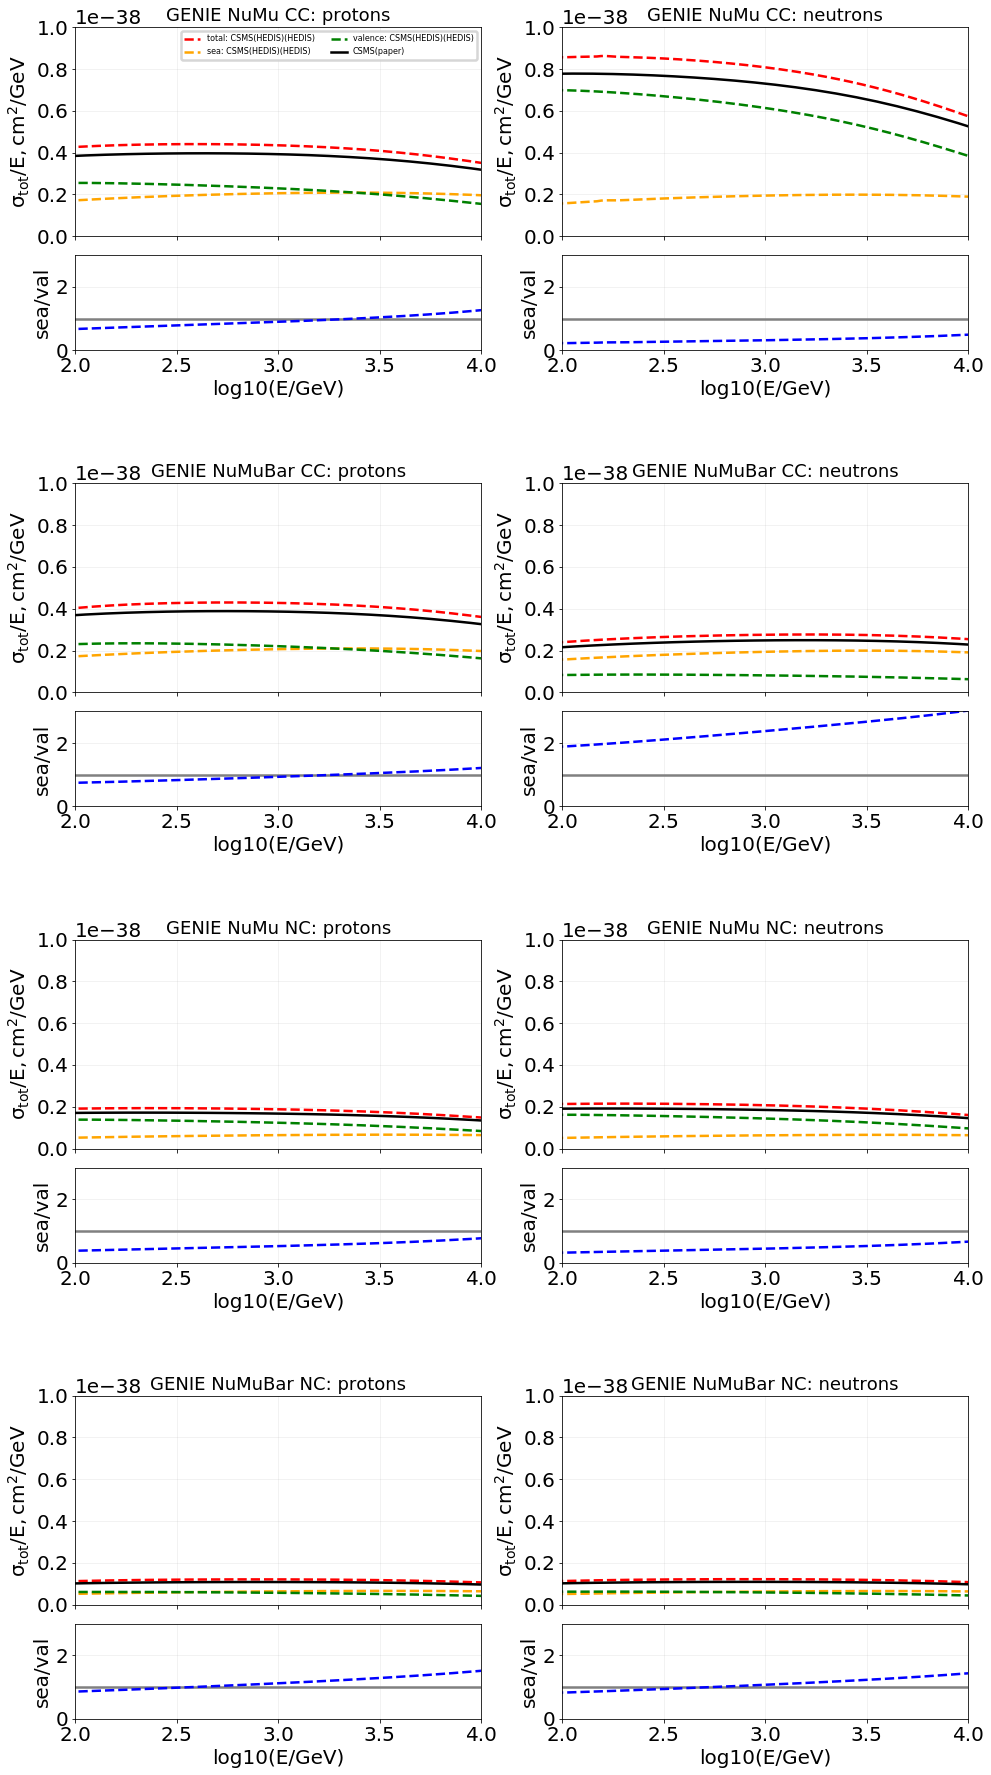

0

In [27]:
def_csms_hedis='GHE19_00b_00_000_fits.pckl'

files=[def_csms_hedis]
hedis_models=['CSMS(HEDIS)']
genie_dets=['']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets, linestyles=['--'])

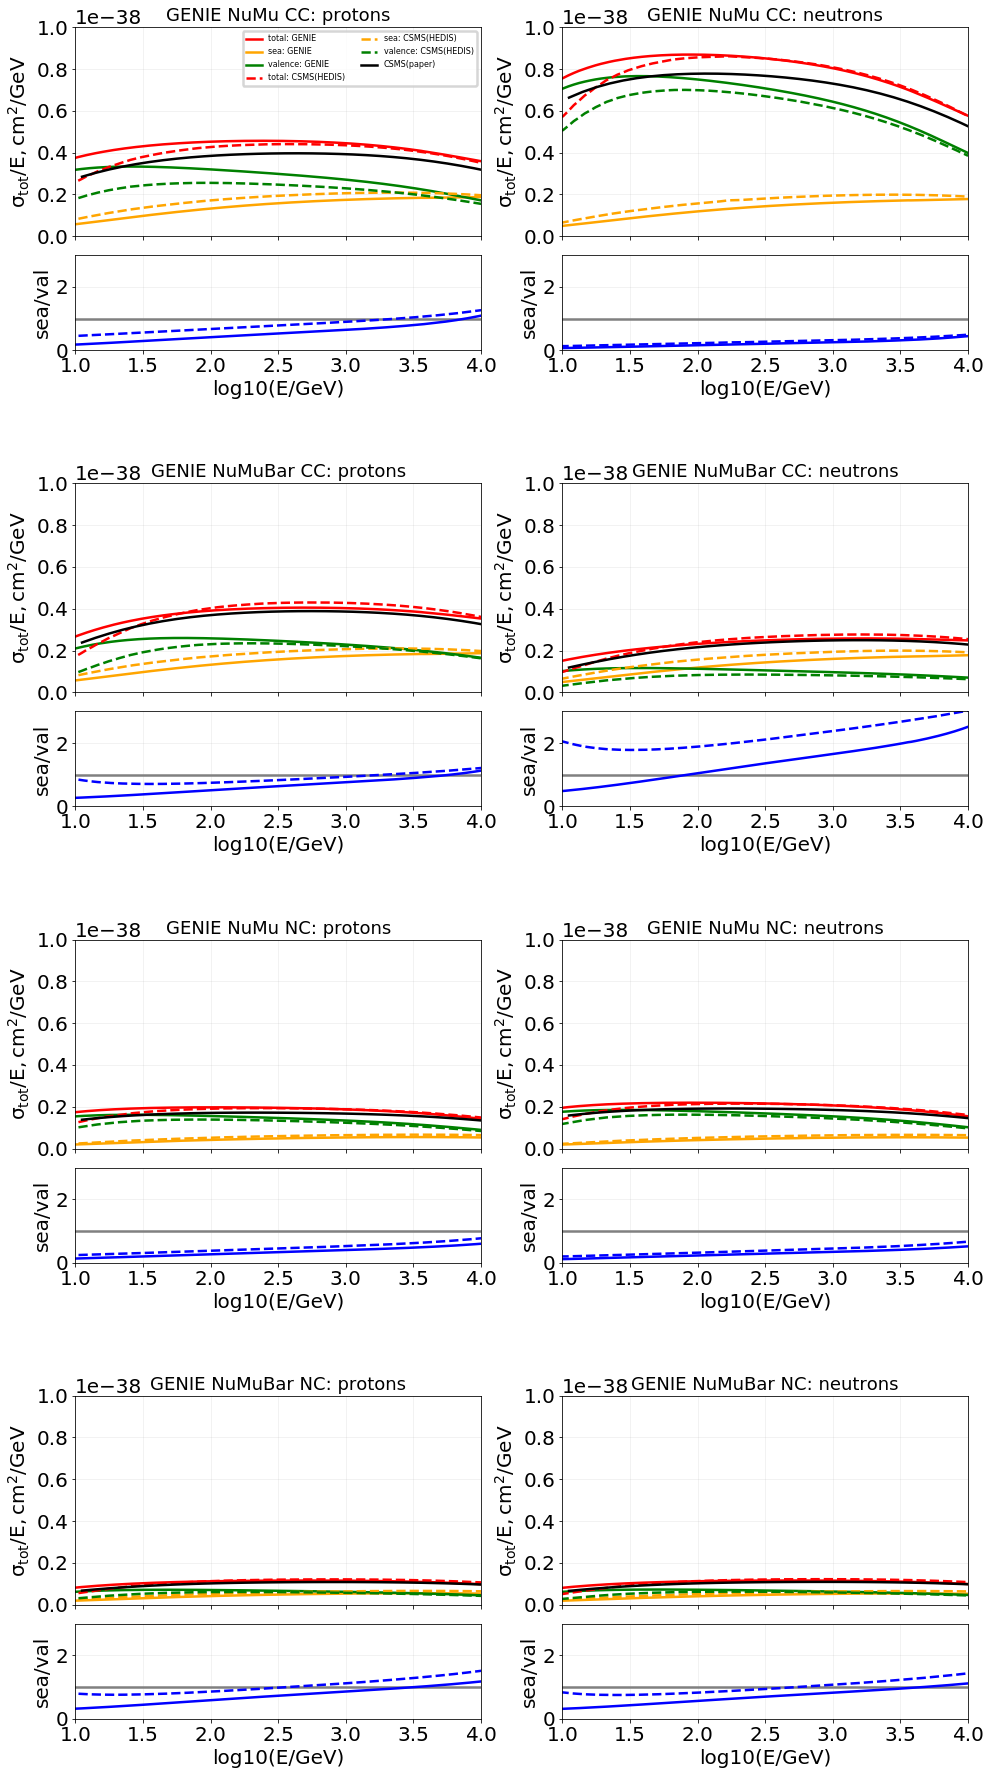

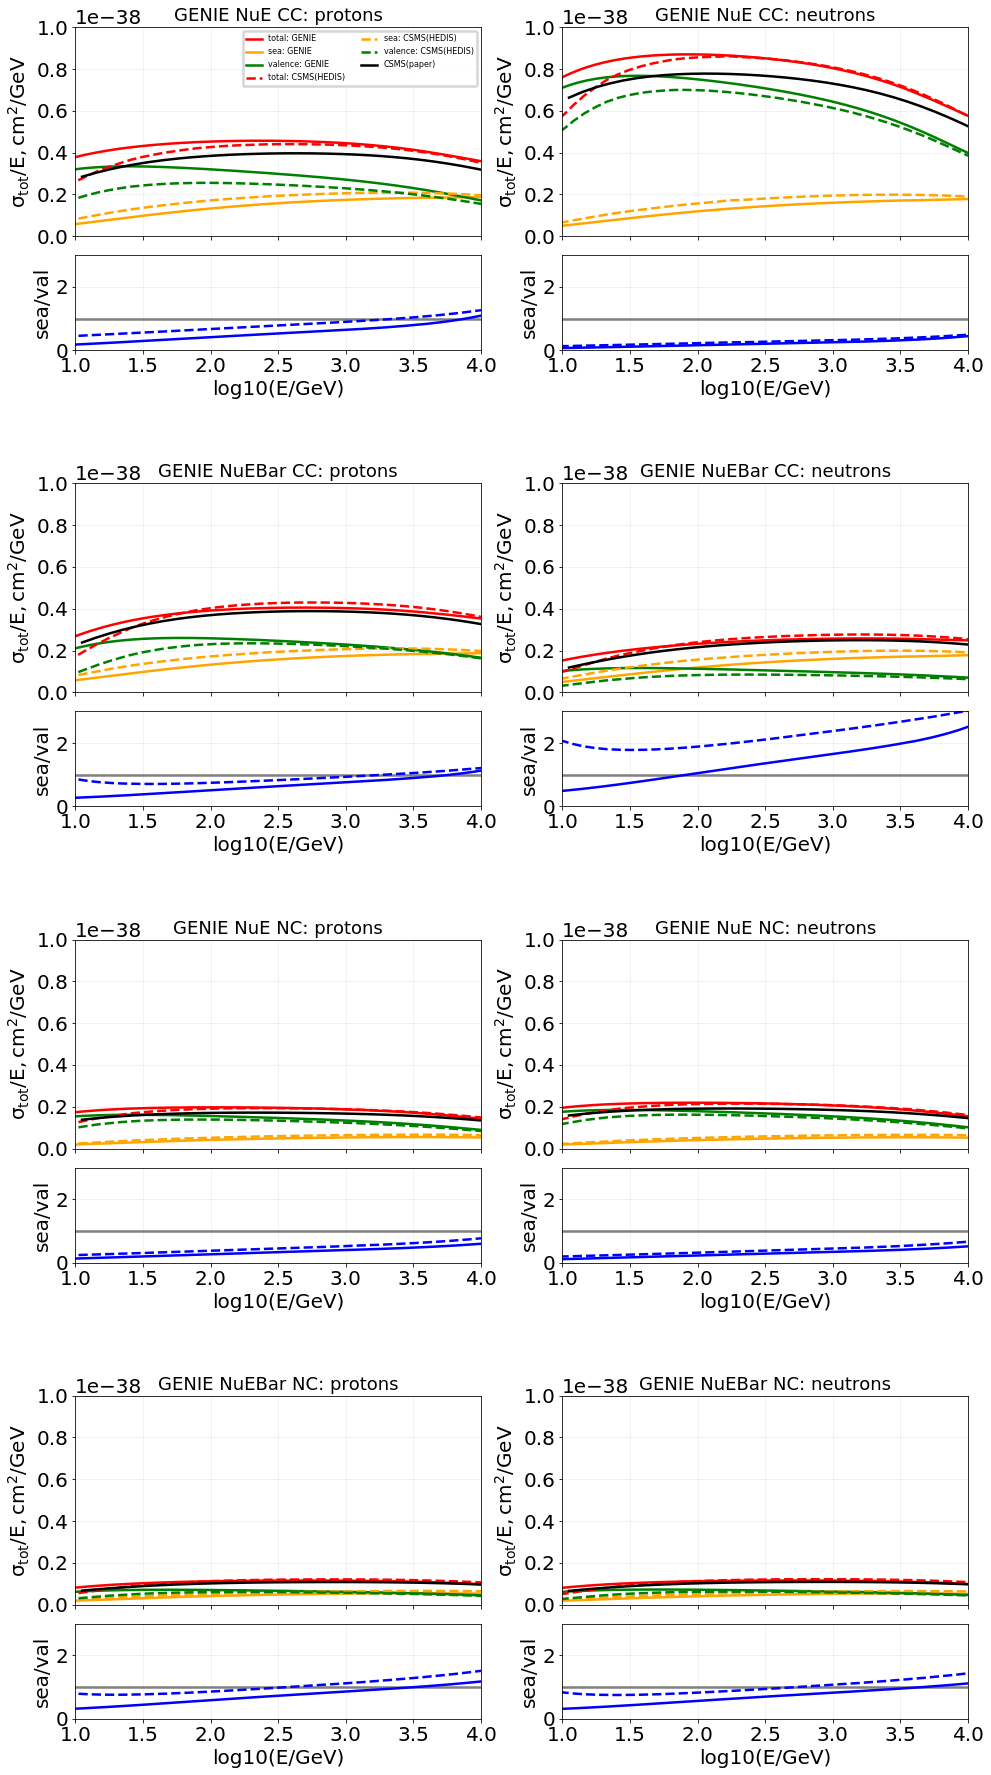

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:144: RuntimeWarning: invalid value encountered in true_divide


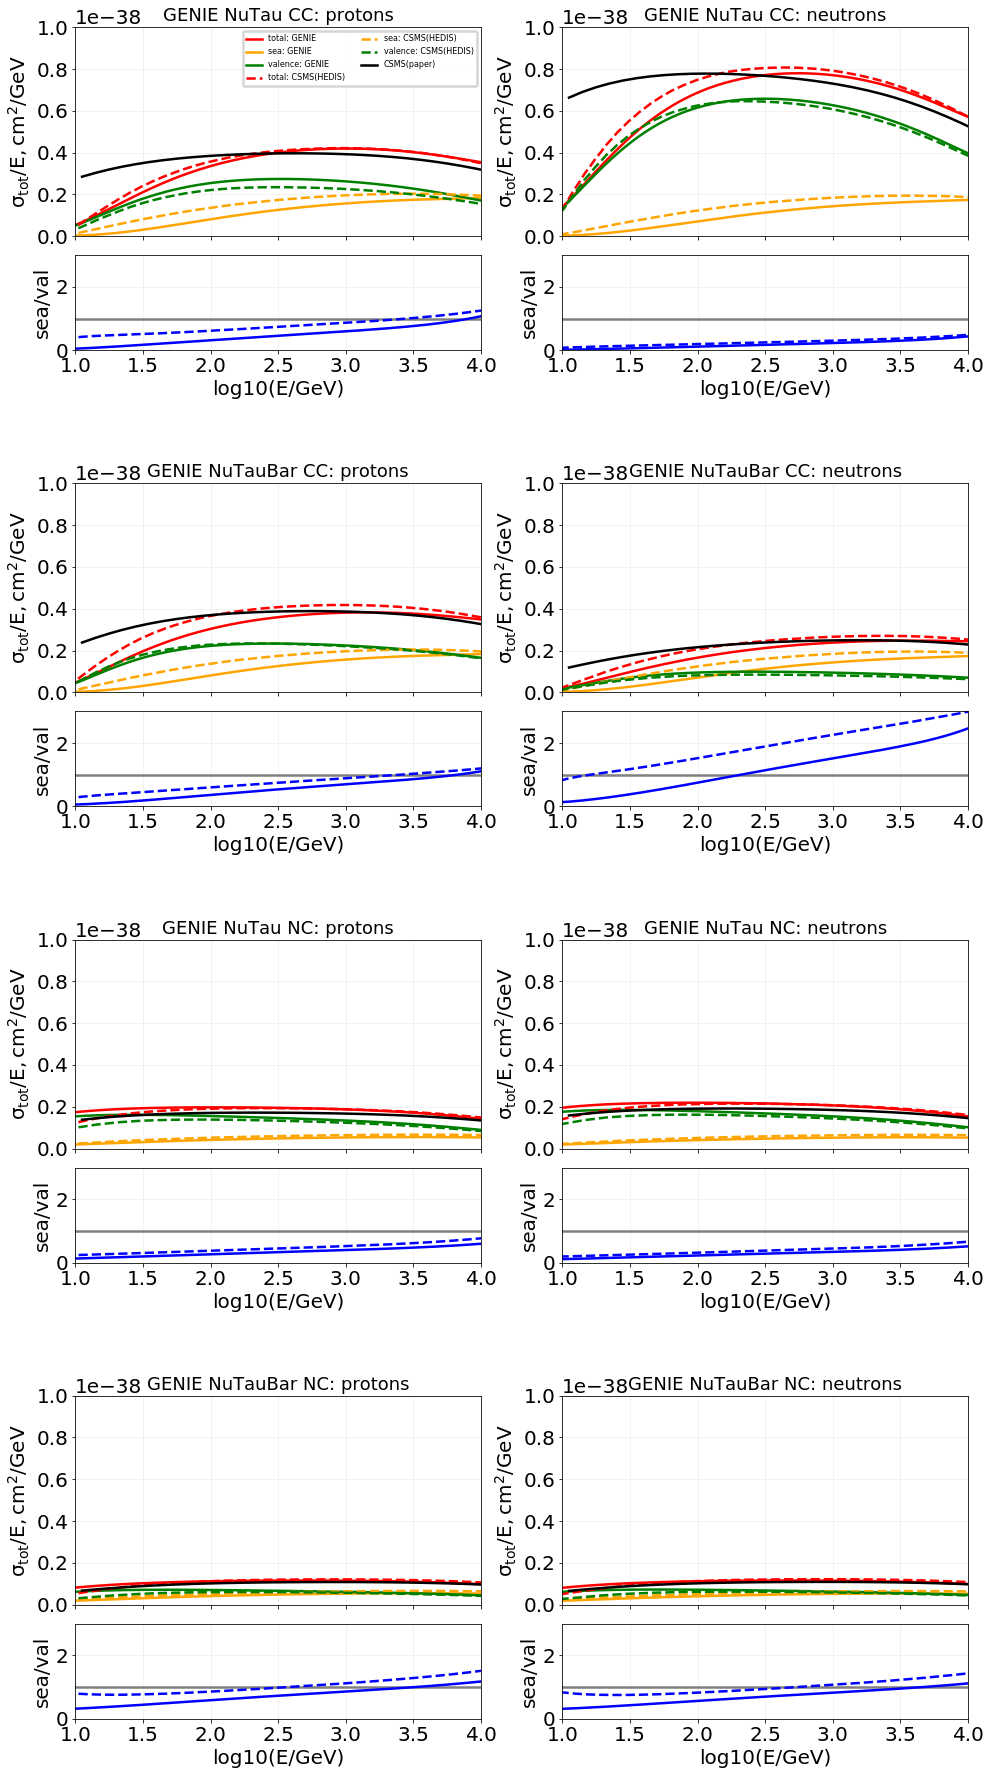

0

In [16]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

plot_unit(fnames=[g2_file,hedis_file], nu=14)
plot_unit(fnames=[g2_file,hedis_file], nu=12)
plot_unit(fnames=[g2_file,hedis_file], nu=16)

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:144: RuntimeWarning: invalid value encountered in true_divide


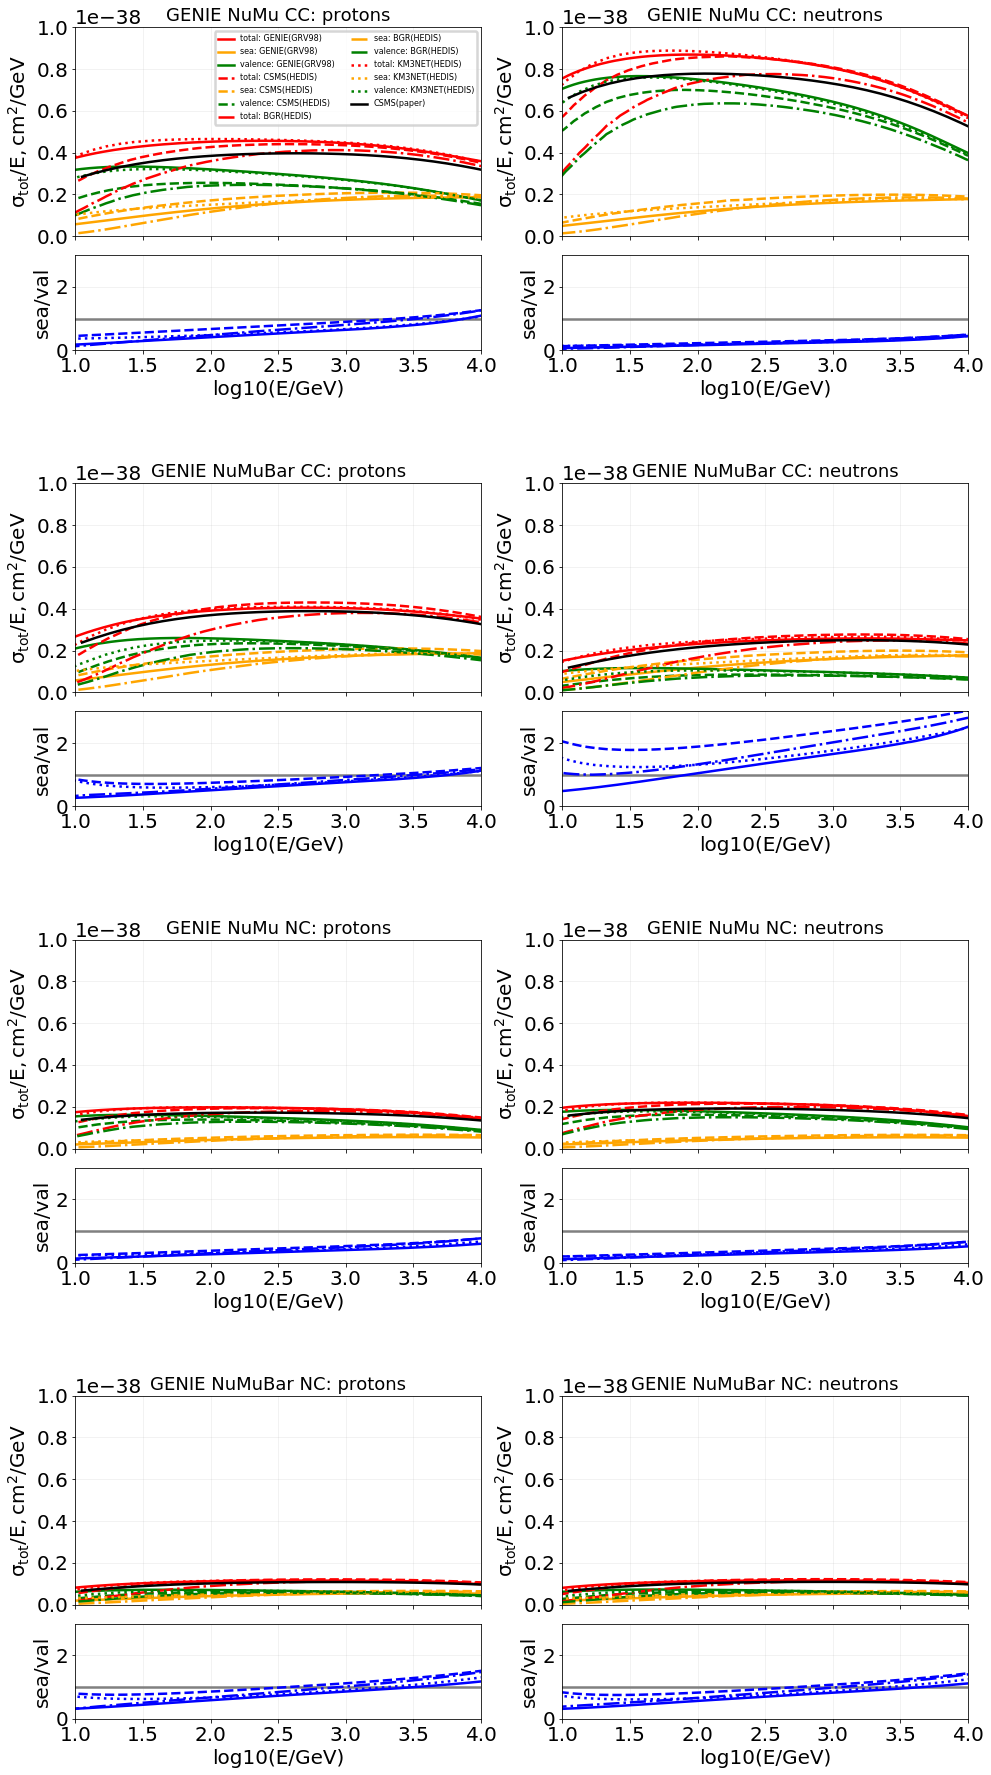

0

In [20]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
hedis_bgr_file = 'GENIE_HEDIS_water_splines_n50_BGR_fits.pckl'
hedis_km3net_file = 'GENIE_HEDIS_water_splines_n50_KM3NET_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

files=[g2_file,hedis_file,hedis_bgr_file,hedis_km3net_file]
hedis_models=['','CSMS','BGR','KM3NET']
genie_dets=['(GRV98)','','','']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets)
# plot_unit(fnames=files, nu=12, hedis_model=hedis_models, genie_det=genie_dets)
# plot_unit(fnames=files, nu=16, hedis_model=hedis_models, genie_det=genie_dets)

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:144: RuntimeWarning: invalid value encountered in true_divide


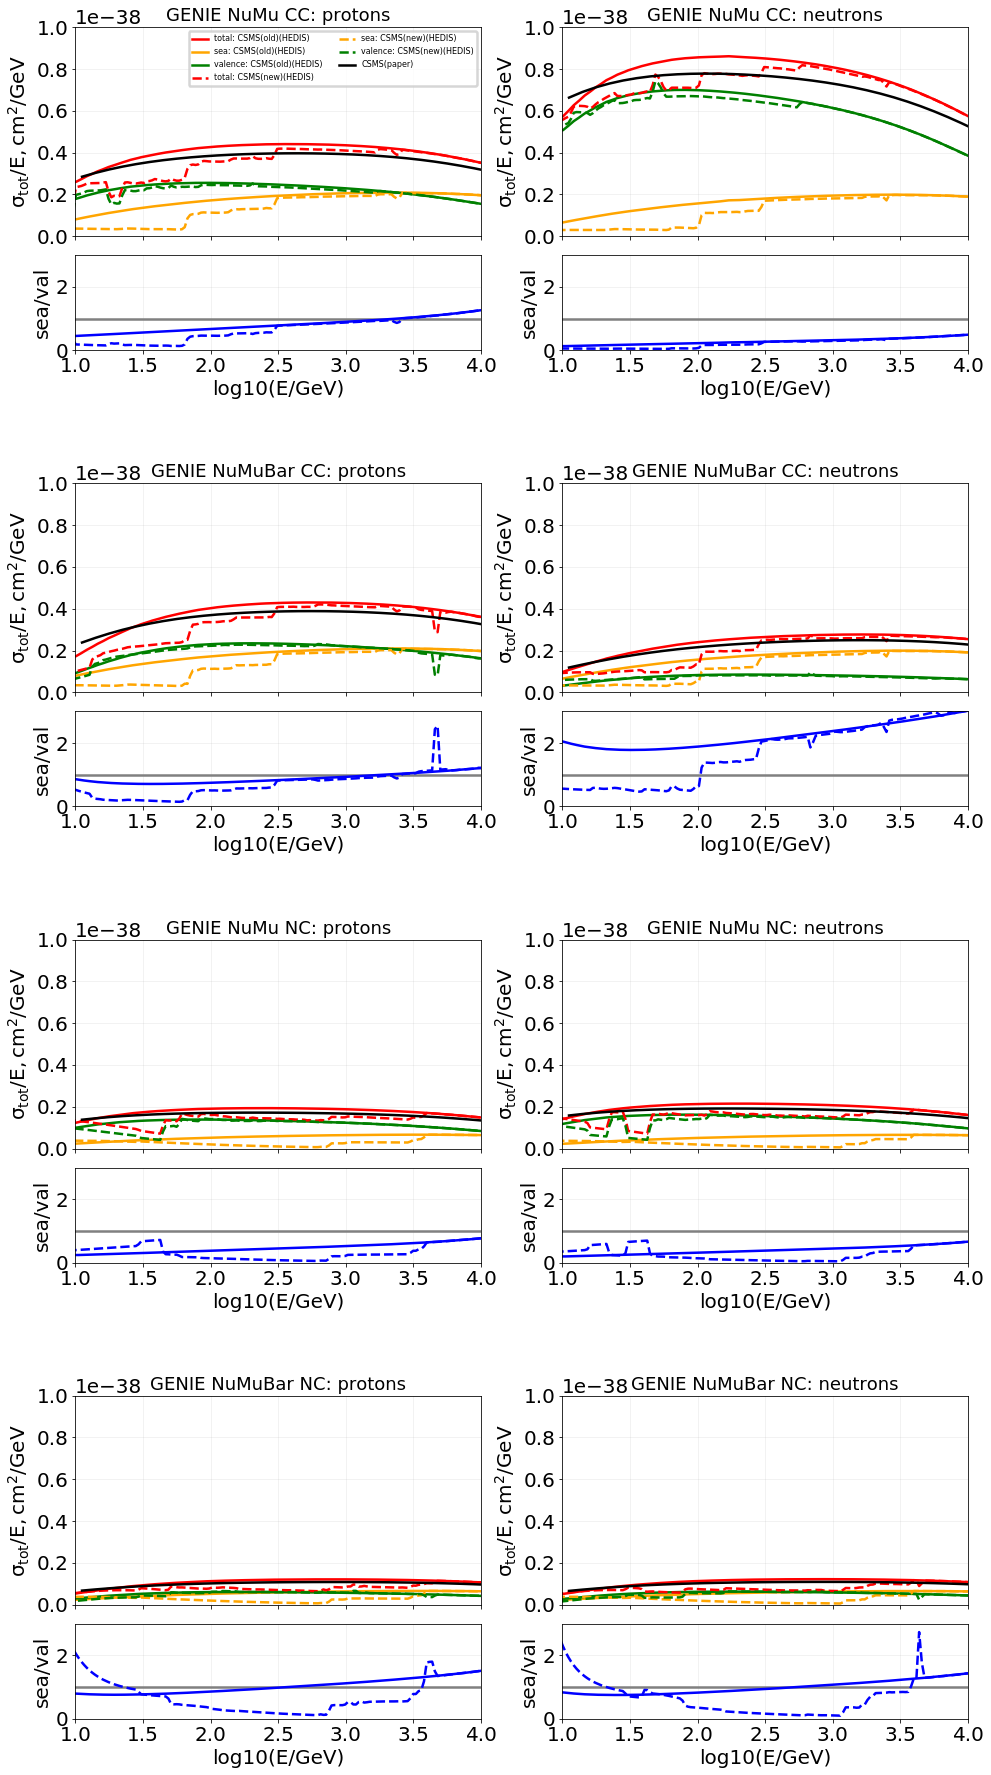

0

In [21]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
hedis_bgr_file = 'GENIE_HEDIS_water_splines_n50_BGR_fits.pckl'
hedis_km3net_file = 'GENIE_HEDIS_water_splines_n50_KM3NET_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'
hedis_csms='GENIE_HEDIS_water_splines_CSMS_fits.pckl'
hedis_km3net='GENIE_HEDIS_water_splines_KM3NET_fits.pckl'

files=[hedis_file, hedis_csms]
hedis_models=['CSMS(old)','CSMS(new)']
# genie_dets=['(GRV98)','','','']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets)
# plot_unit(fnames=files, nu=12, hedis_model=hedis_models, genie_det=genie_dets)
# plot_unit(fnames=files, nu=16, hedis_model=hedis_models, genie_det=genie_dets)

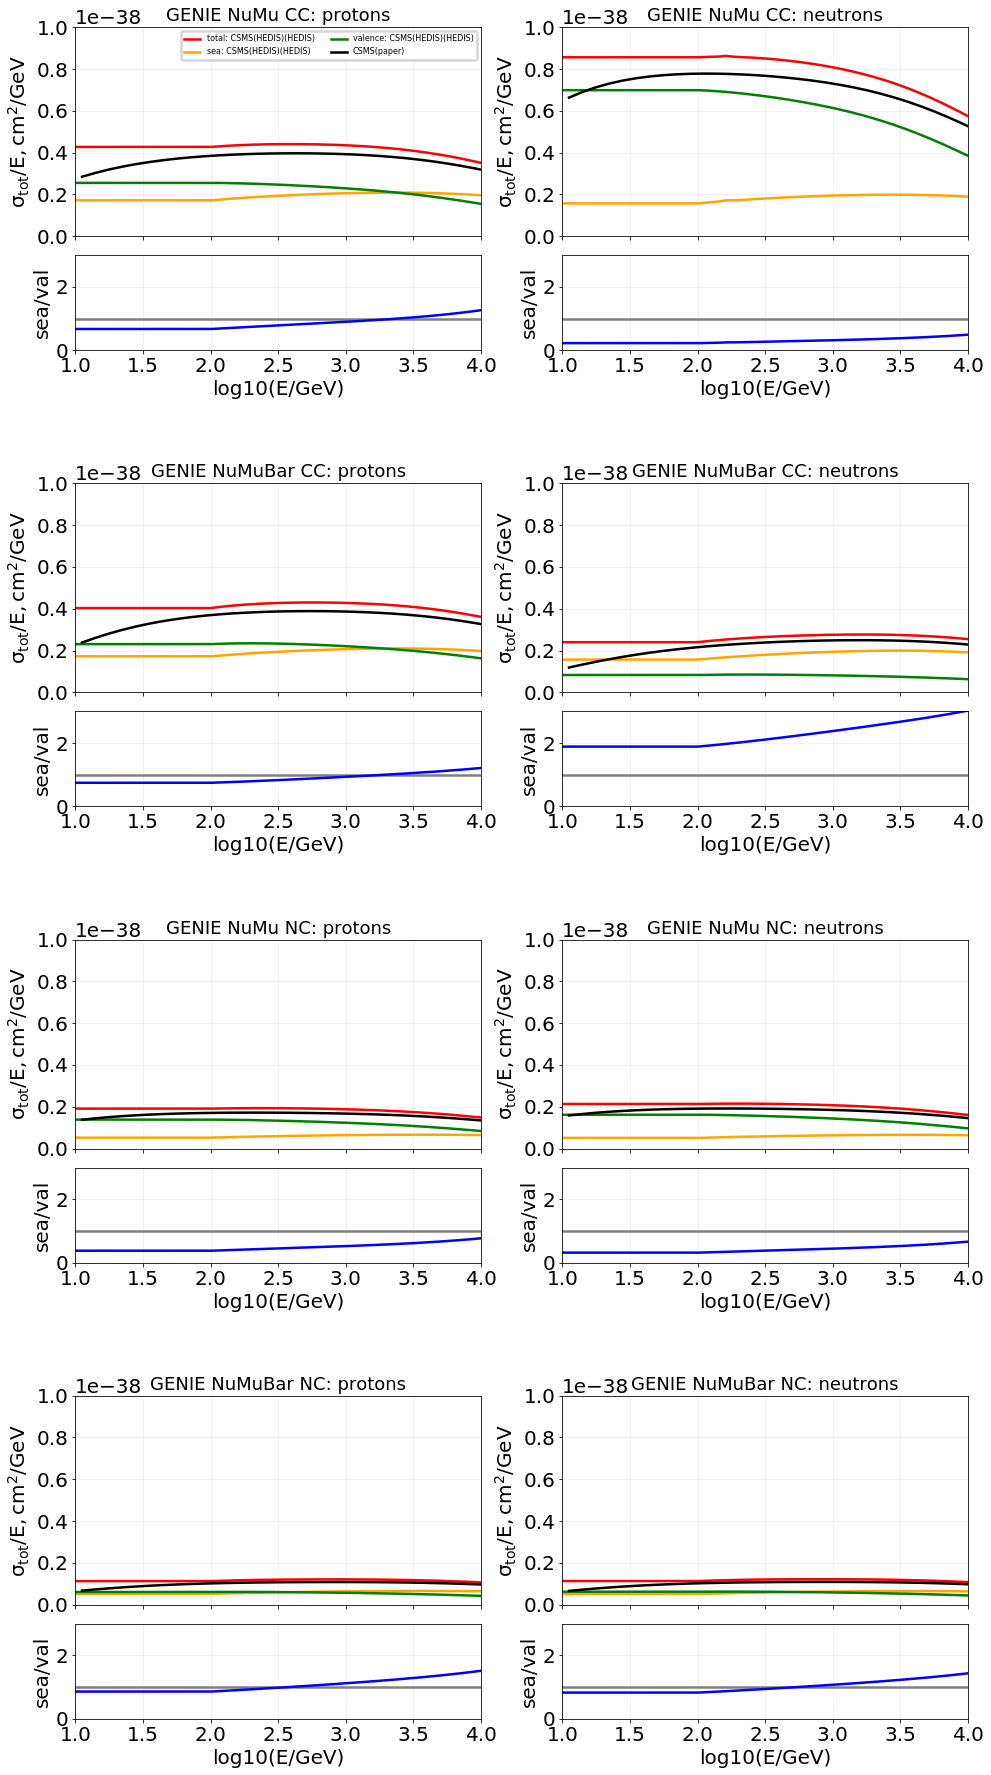

0

In [22]:
def_csms_hedis='GHE19_00b_00_000_fits.pckl'

files=[def_csms_hedis]
hedis_models=['CSMS(HEDIS)']
genie_dets=['']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets)

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:144: RuntimeWarning: invalid value encountered in true_divide


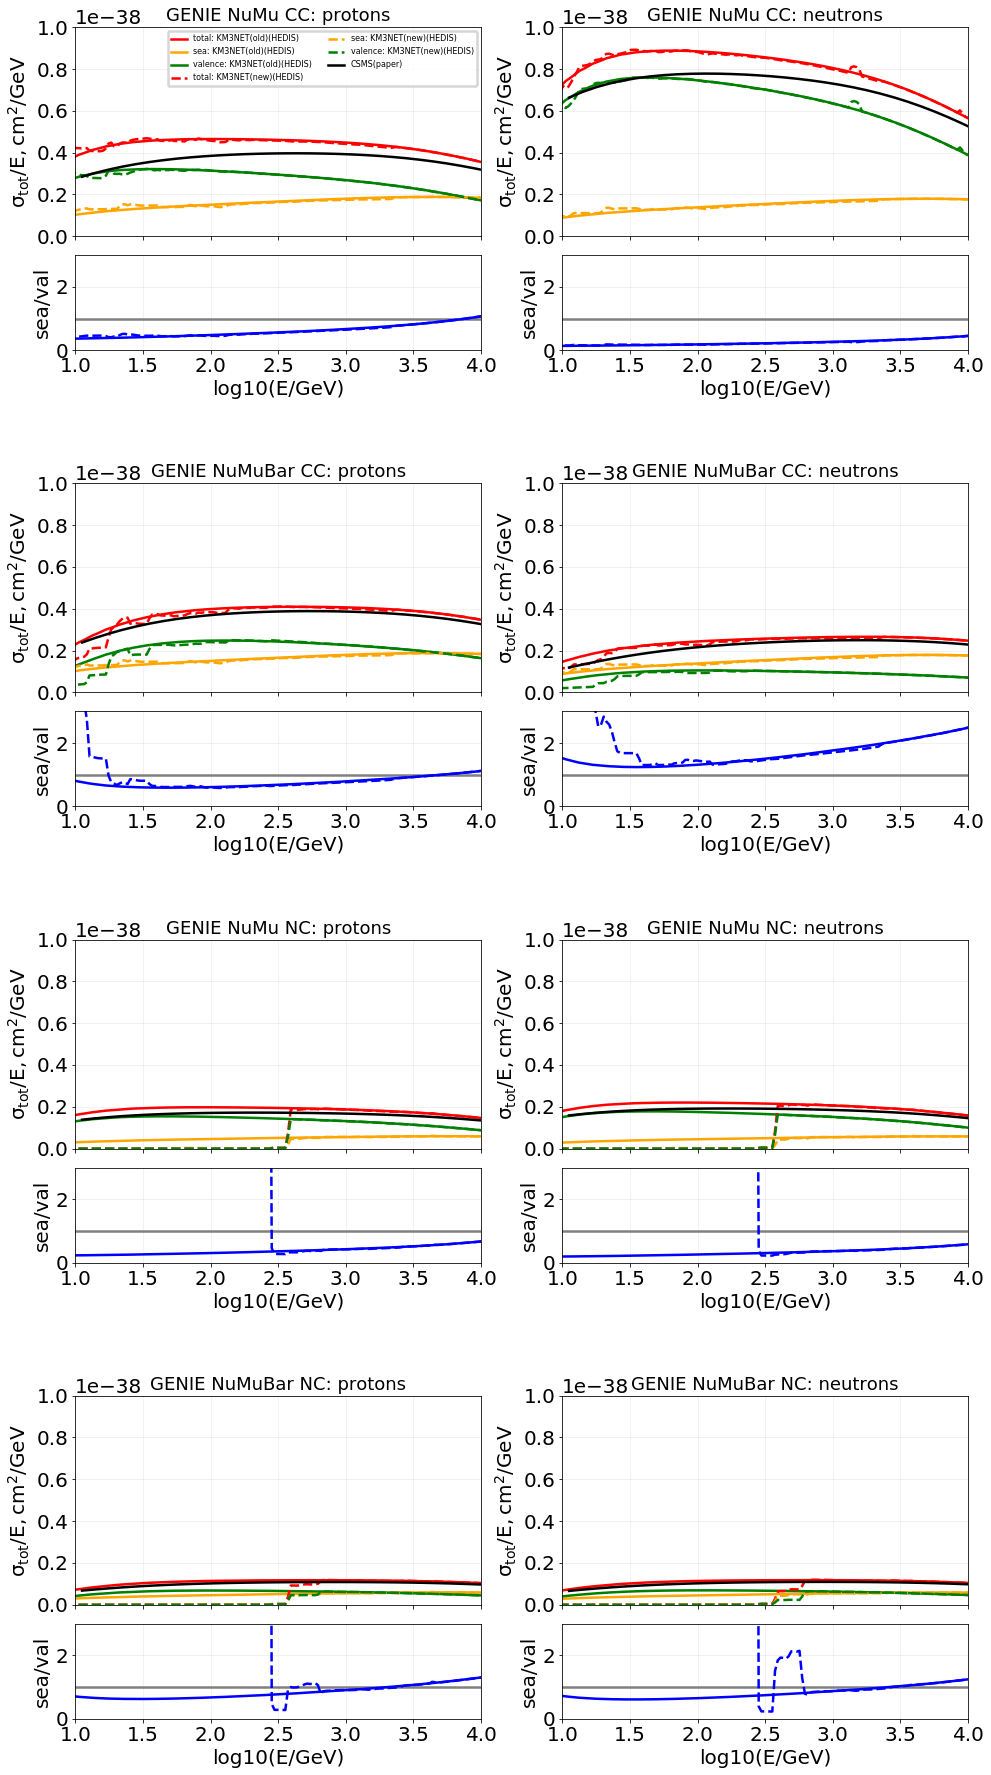

0

In [19]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
hedis_bgr_file = 'GENIE_HEDIS_water_splines_n50_BGR_fits.pckl'
hedis_km3net_file = 'GENIE_HEDIS_water_splines_n50_KM3NET_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'
hedis_csms='GENIE_HEDIS_water_splines_CSMS_fits.pckl'
hedis_km3net='GENIE_HEDIS_water_splines_KM3NET_fits.pckl'

files=[hedis_km3net_file, hedis_km3net]
hedis_models=['KM3NET(old)','KM3NET(new)']
# genie_dets=['(GRV98)','','','']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets)
# plot_unit(fnames=files, nu=12, hedis_model=hedis_models, genie_det=genie_dets)
# plot_unit(fnames=files, nu=16, hedis_model=hedis_models, genie_det=genie_dets)

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in true_divide


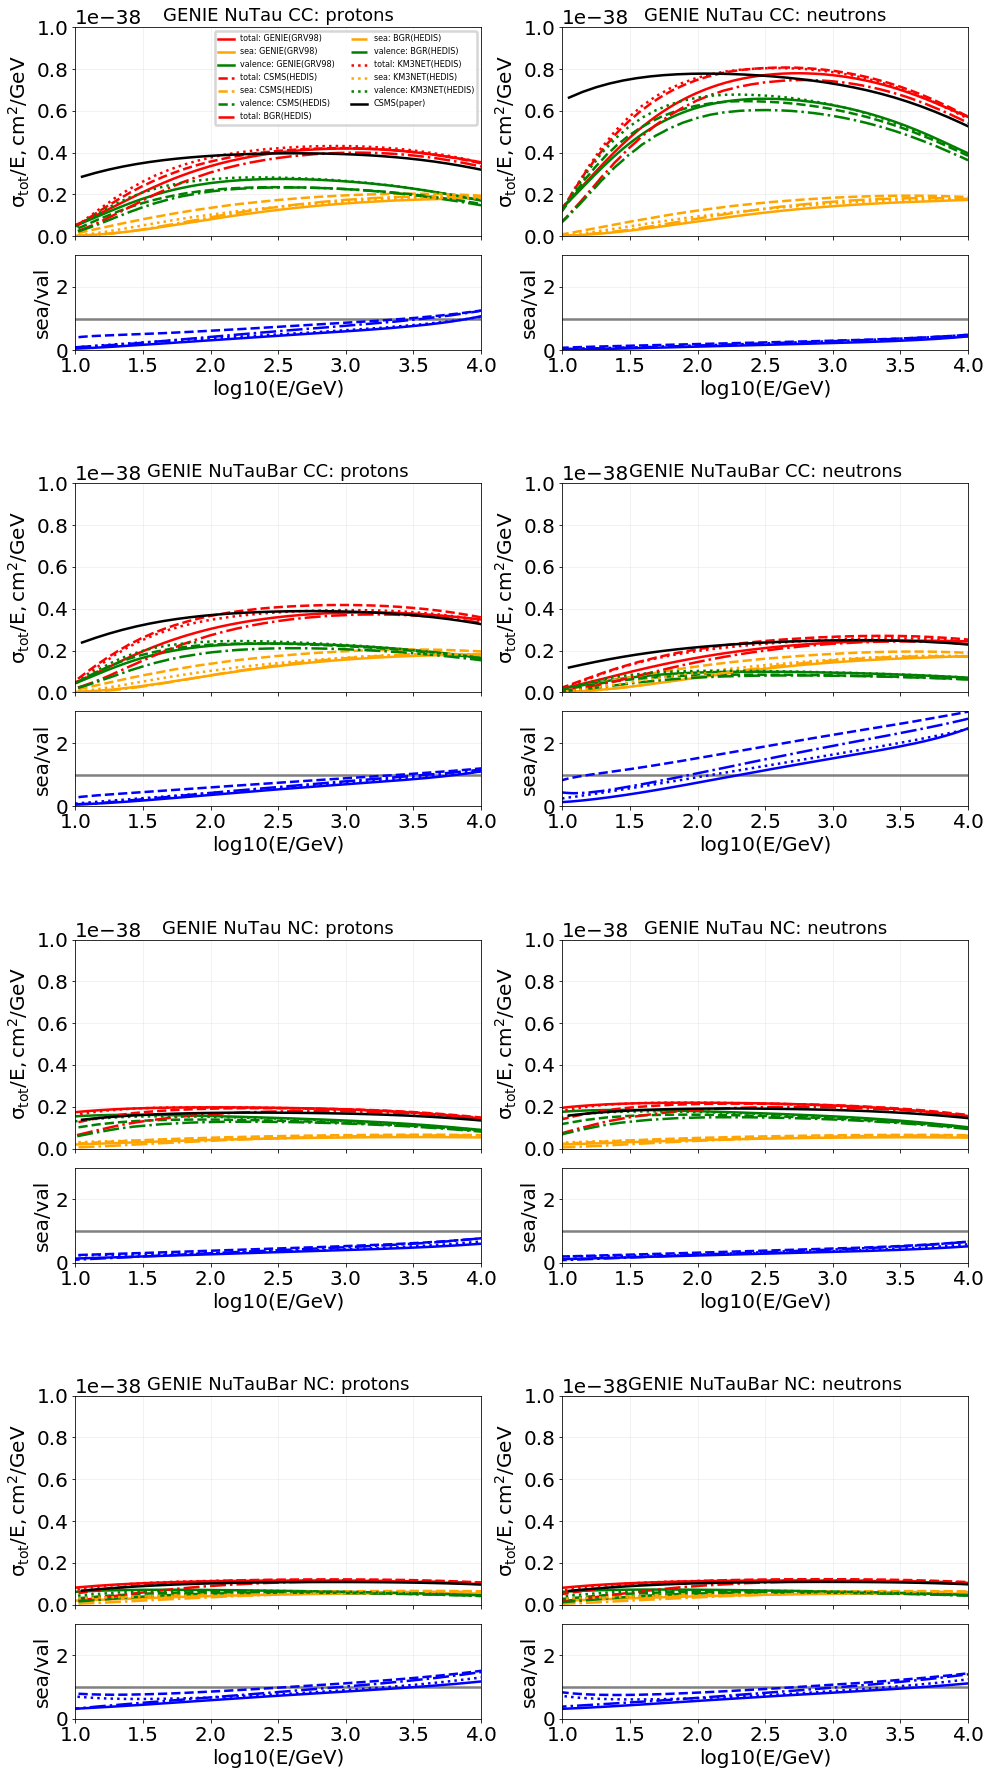

0

In [54]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
hedis_bgr_file = 'GENIE_HEDIS_water_splines_n50_BGR_fits.pckl'
hedis_km3net_file = 'GENIE_HEDIS_water_splines_n50_KM3NET_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

files=[g2_file,hedis_file,hedis_bgr_file,hedis_km3net_file]
hedis_models=['','CSMS','BGR','KM3NET']
genie_dets=['(GRV98)','','','']

plot_unit(fnames=files, nu=16, hedis_model=hedis_models, genie_det=genie_dets)

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in true_divide


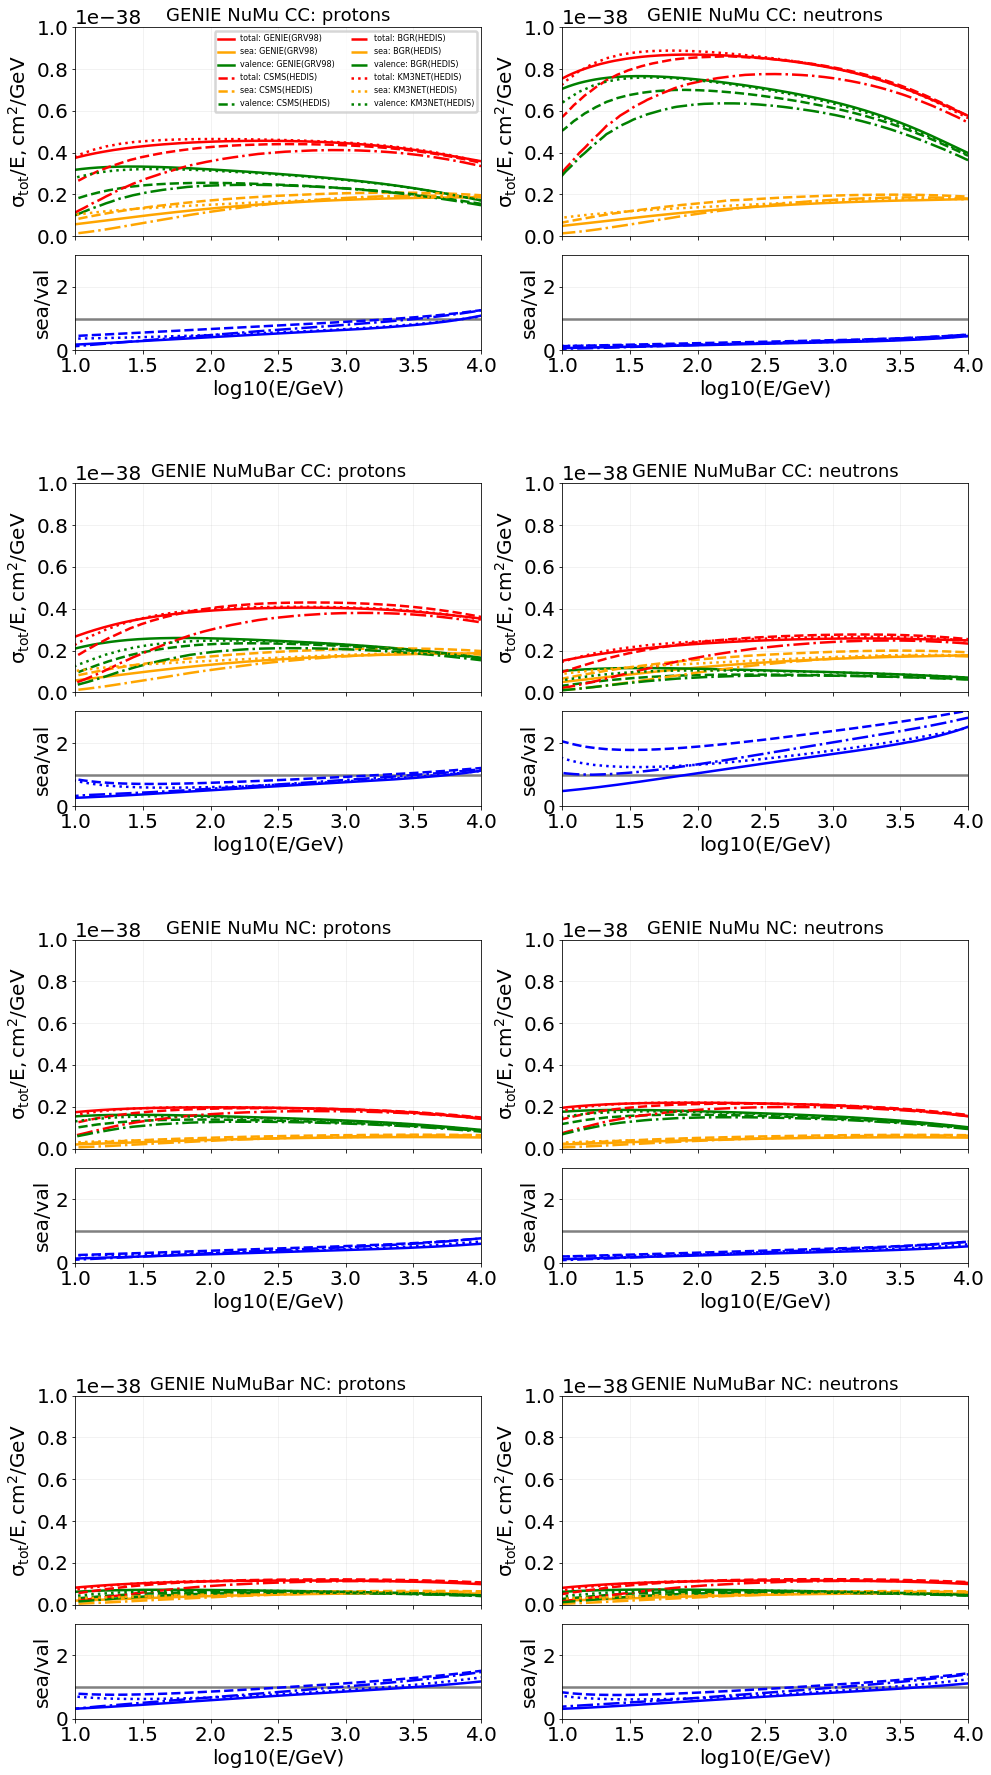

0

In [43]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
hedis_bgr_file = 'GENIE_HEDIS_water_splines_n50_BGR_fits.pckl'
hedis_km3net_file = 'GENIE_HEDIS_water_splines_n50_KM3NET_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

files=[g2_file,hedis_file,hedis_bgr_file,hedis_km3net_file]
hedis_models=['','CSMS','BGR','KM3NET']
genie_dets=['(GRV98)','','','']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets, plot_csms=False)
# plot_unit(fnames=files, nu=12, hedis_model=hedis_models, genie_det=genie_dets)
# plot_unit(fnames=files, nu=16, hedis_model=hedis_models, genie_det=genie_dets)

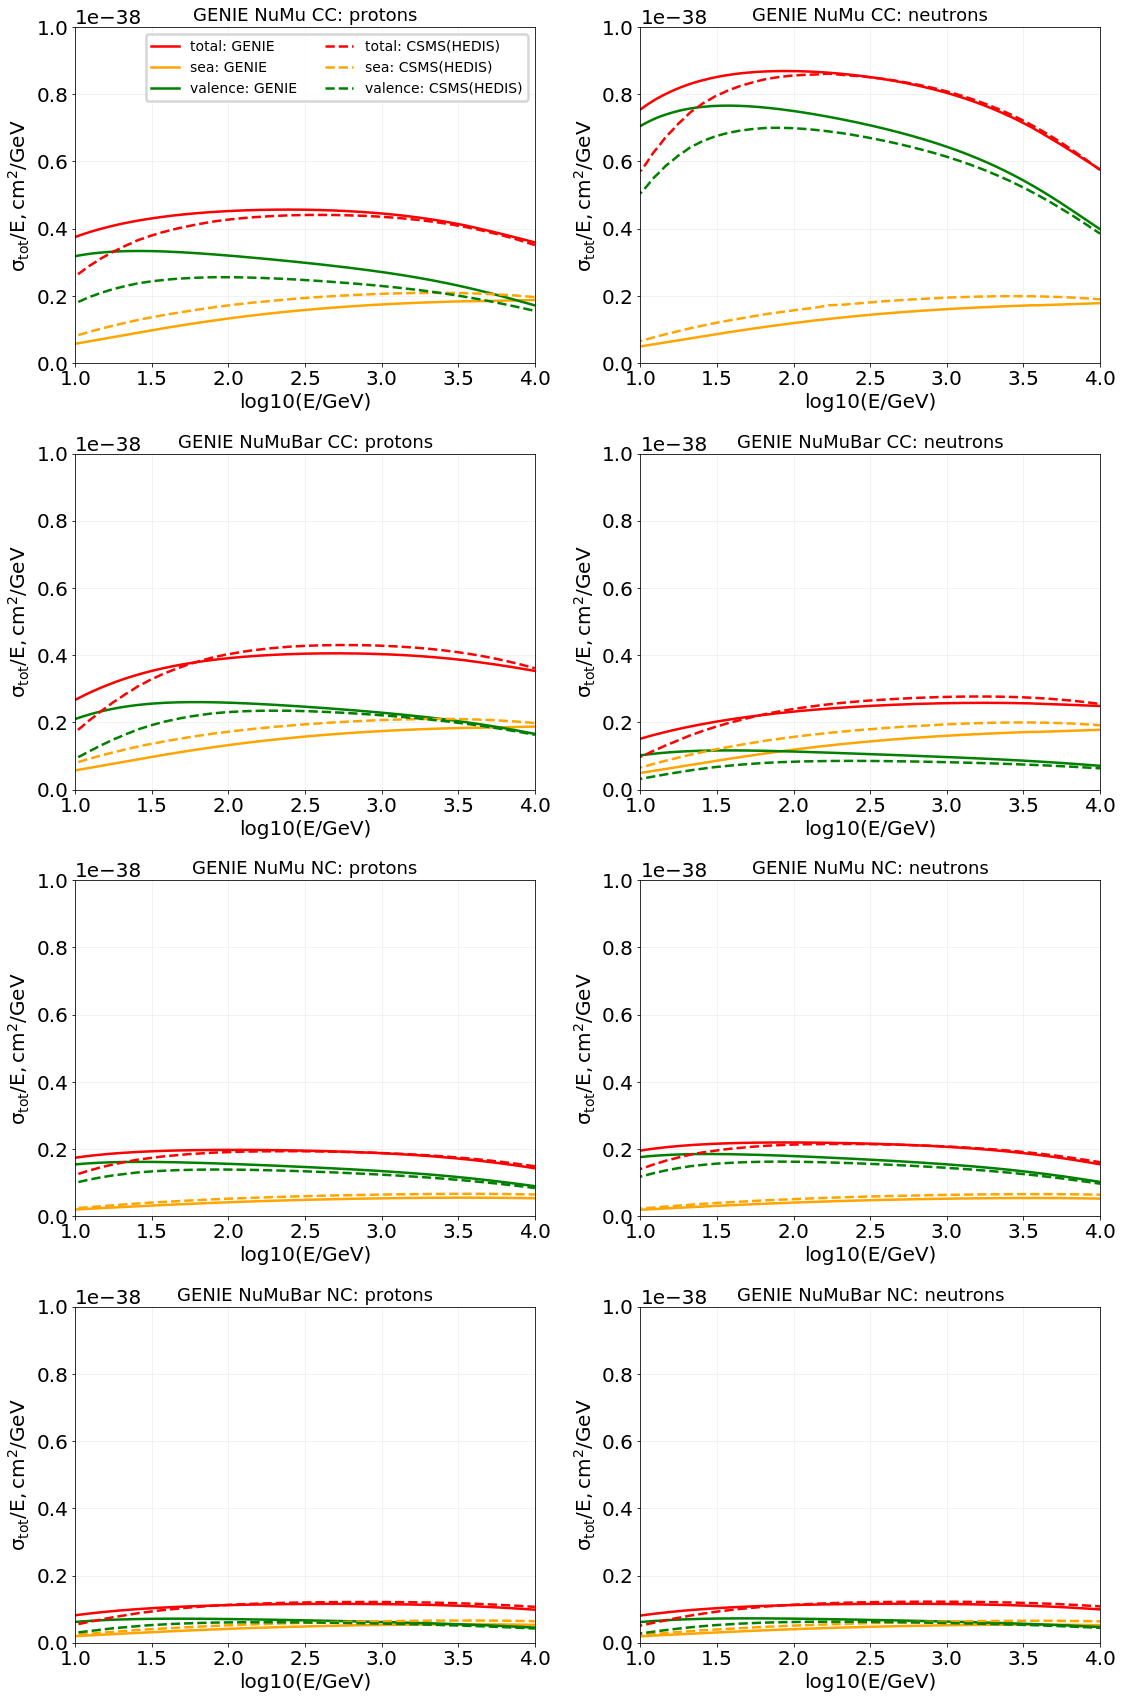

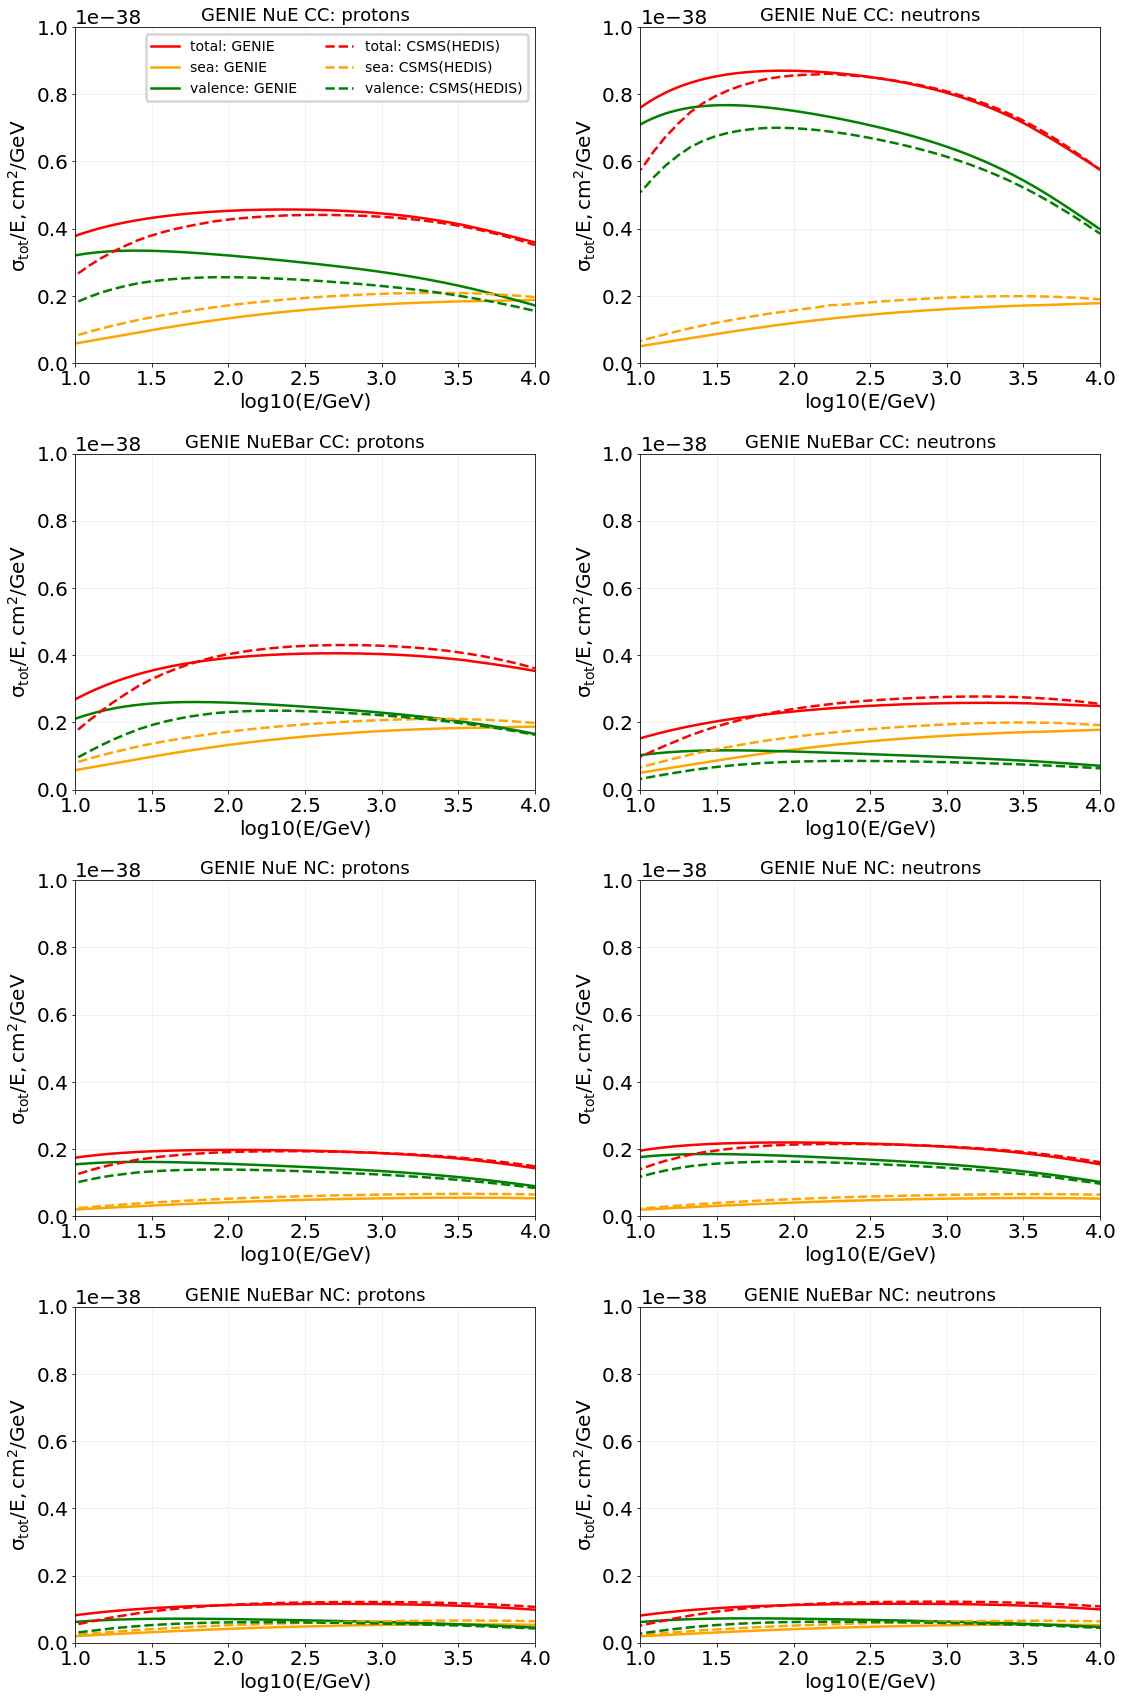

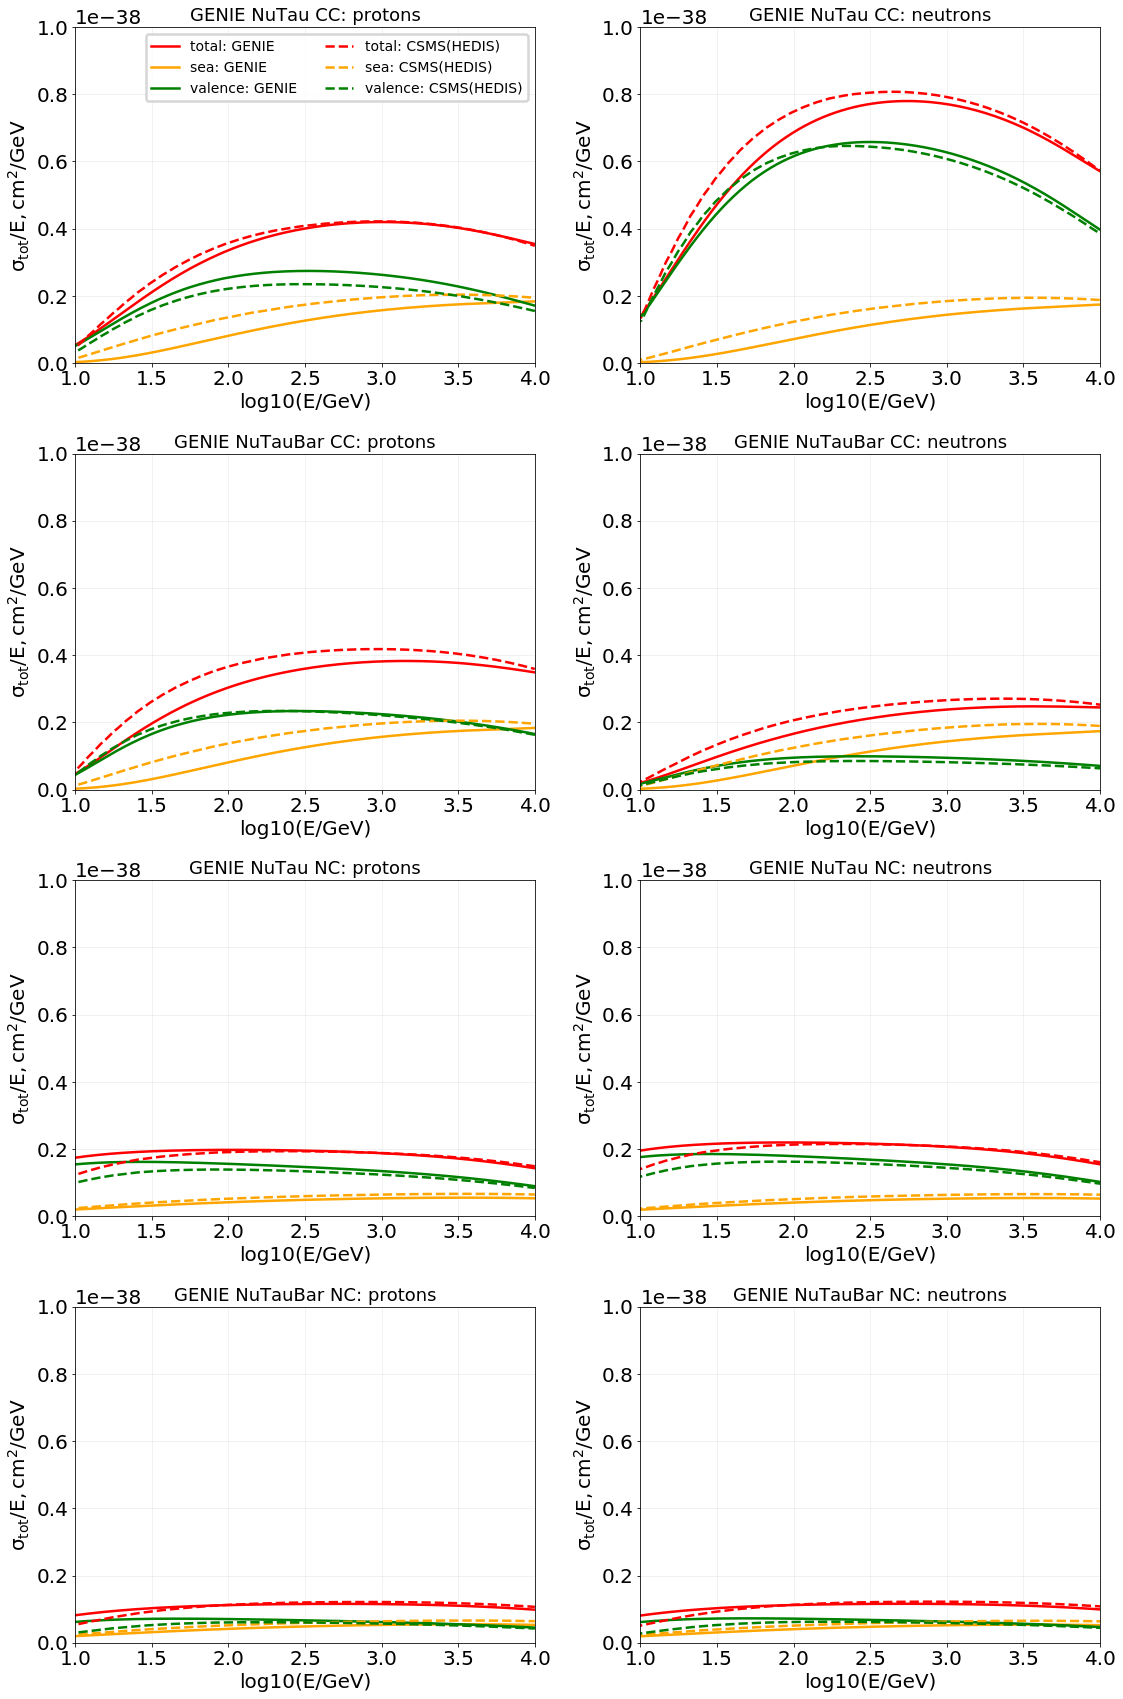

0

In [41]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

plot_unit(fnames=[g2_file,hedis_file], nu=14)
plot_unit(fnames=[g2_file,hedis_file], nu=12)
plot_unit(fnames=[g2_file,hedis_file], nu=16)

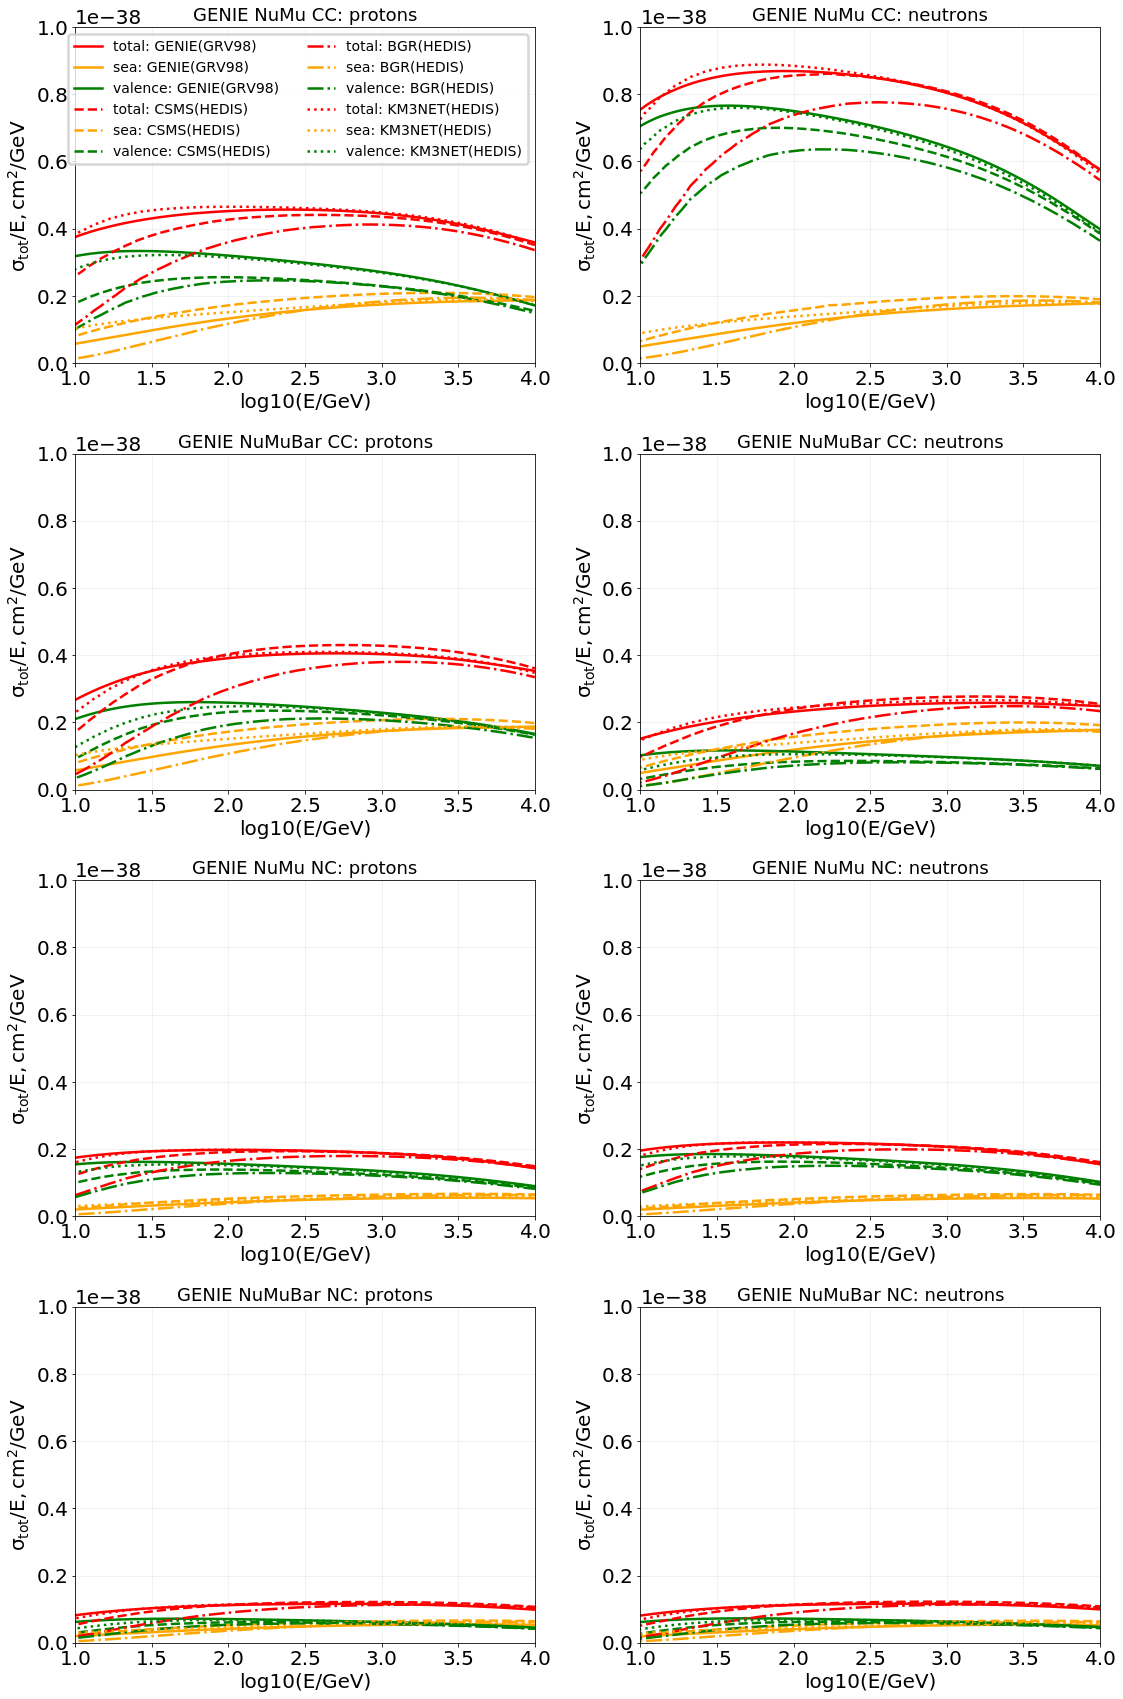

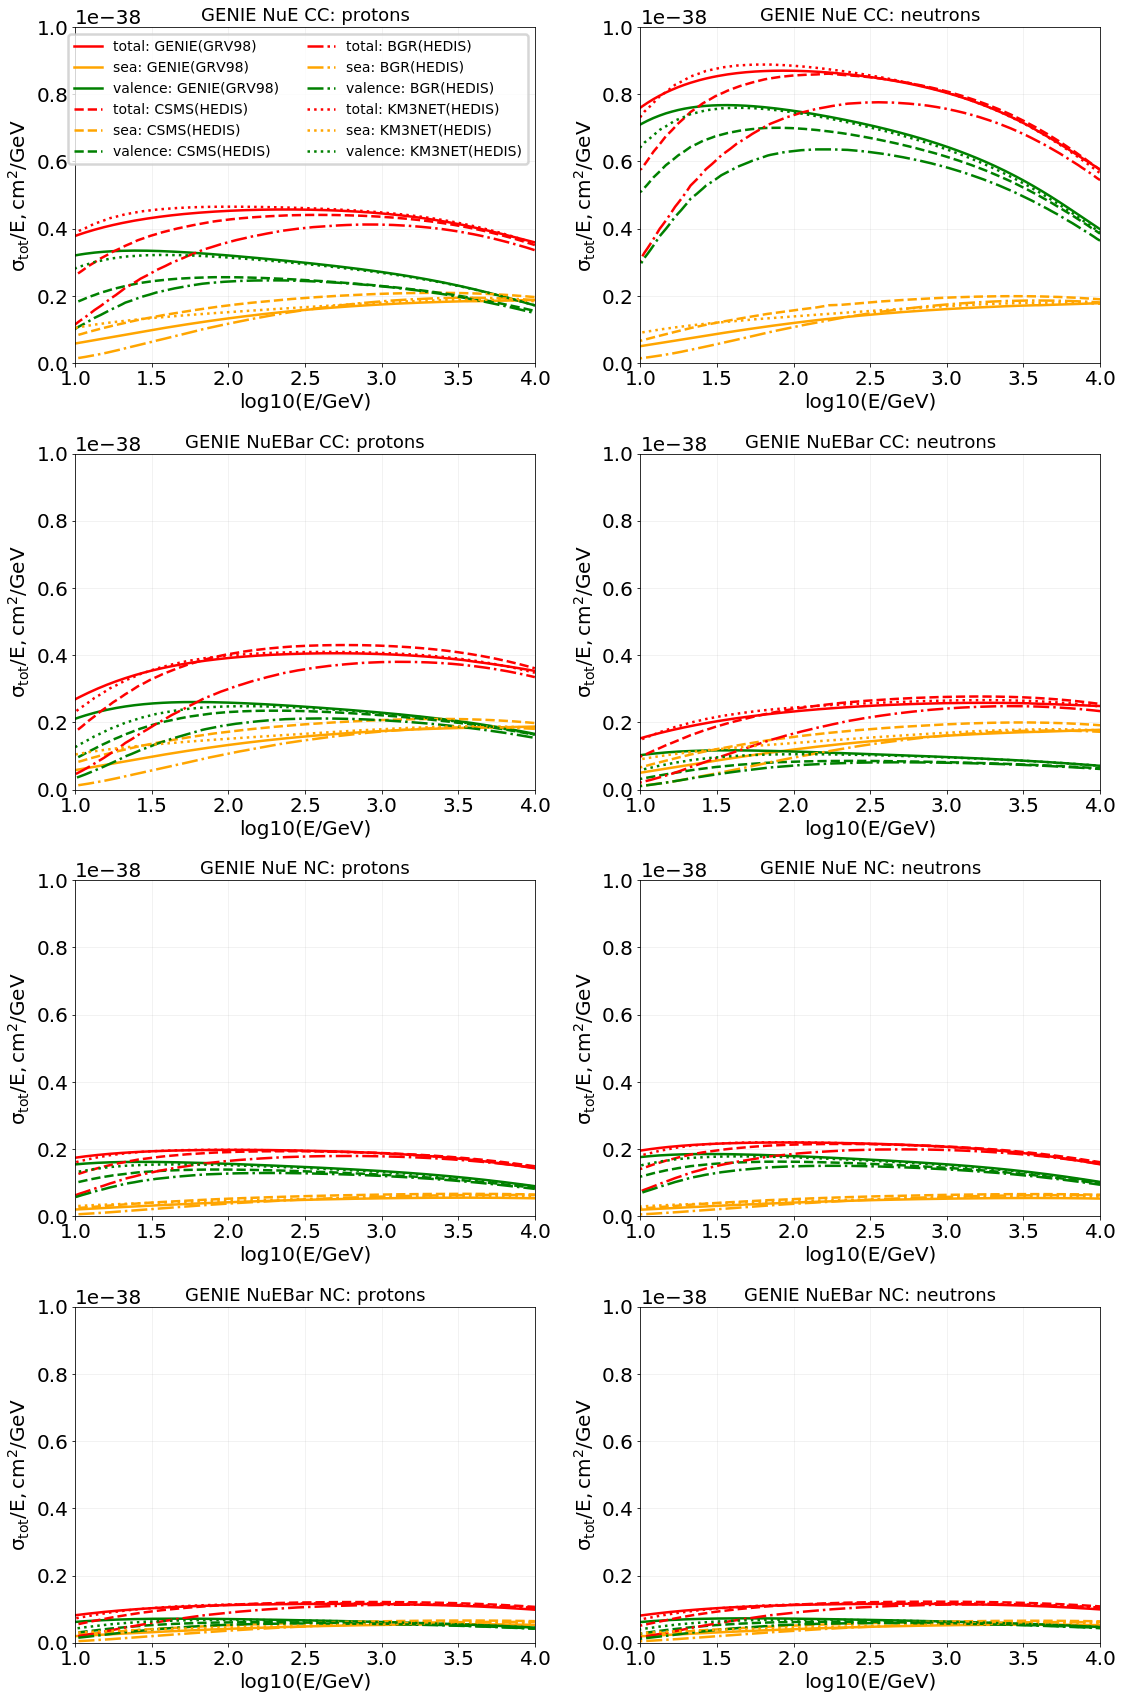

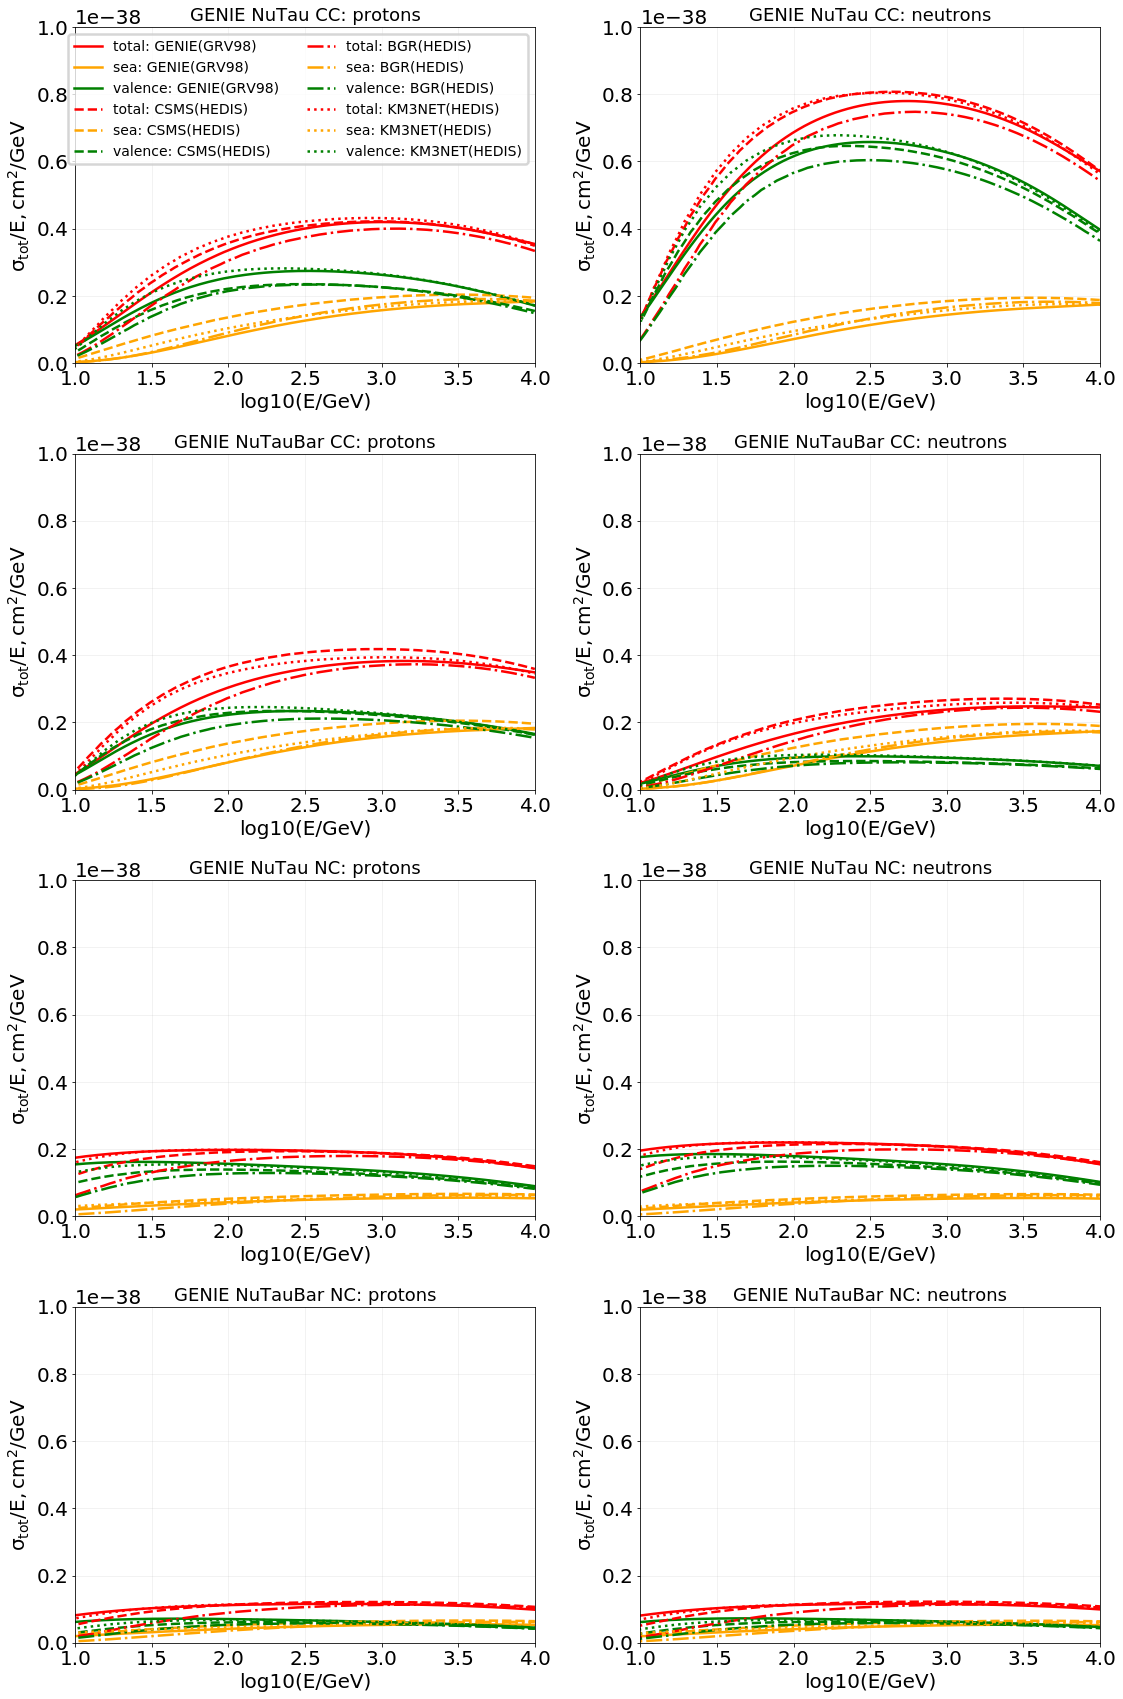

0

In [45]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
hedis_bgr_file = 'GENIE_HEDIS_water_splines_n50_BGR_fits.pckl'
hedis_km3net_file = 'GENIE_HEDIS_water_splines_n50_KM3NET_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

files=[g2_file,hedis_file,hedis_bgr_file,hedis_km3net_file]
hedis_models=['','CSMS','BGR','KM3NET']
genie_dets=['(GRV98)','','','']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets)
plot_unit(fnames=files, nu=12, hedis_model=hedis_models, genie_det=genie_dets)
plot_unit(fnames=files, nu=16, hedis_model=hedis_models, genie_det=genie_dets)

# Wcut=0 check

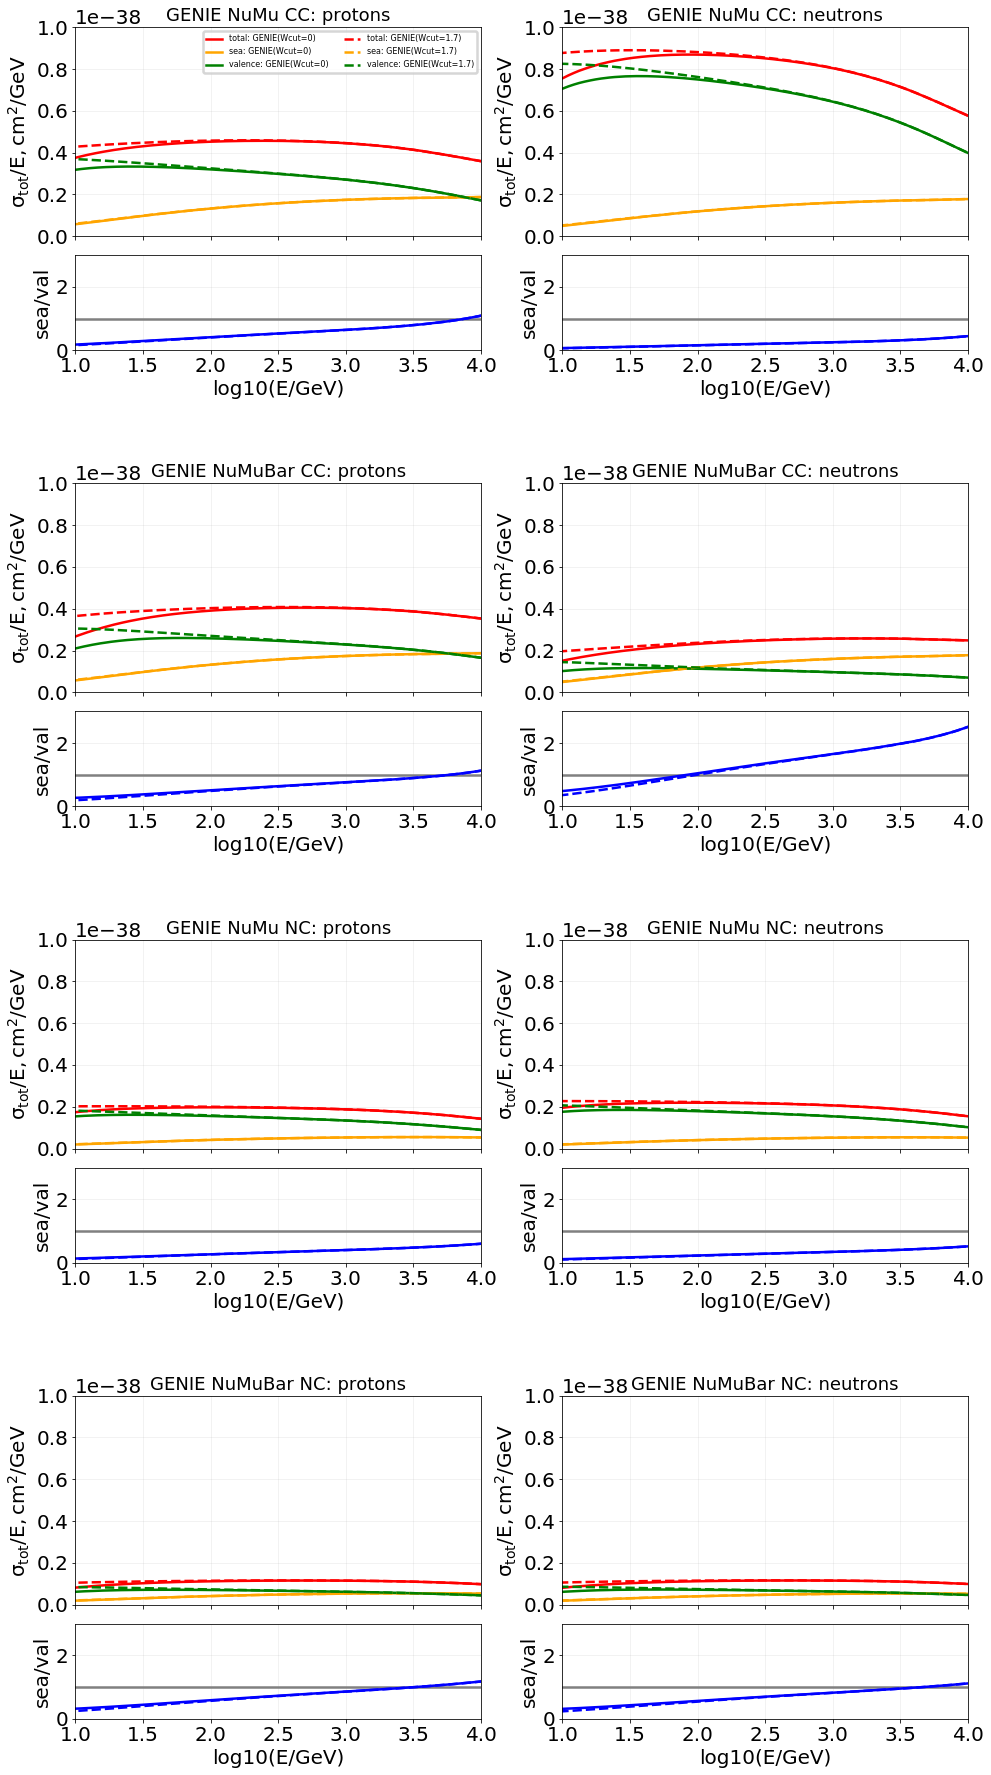

0

In [57]:
hedis_file = 'GENIE_2_12_8_water_splines_highen_Wcut0_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

plot_unit(fnames=[g2_file,hedis_file], nu=14, 
          genie_det=['(Wcut=0)','(Wcut=1.7)'], plot_csms=False)


# new splines

In [205]:
hedis_csms='GENIE_HEDIS_water_splines_CSMS_fits.pckl'
hedis_km3net='GENIE_HEDIS_water_splines_KM3NET_fits.pckl'

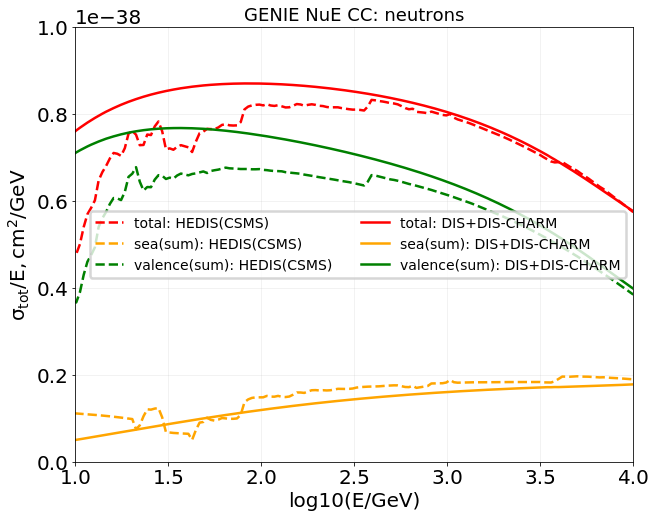

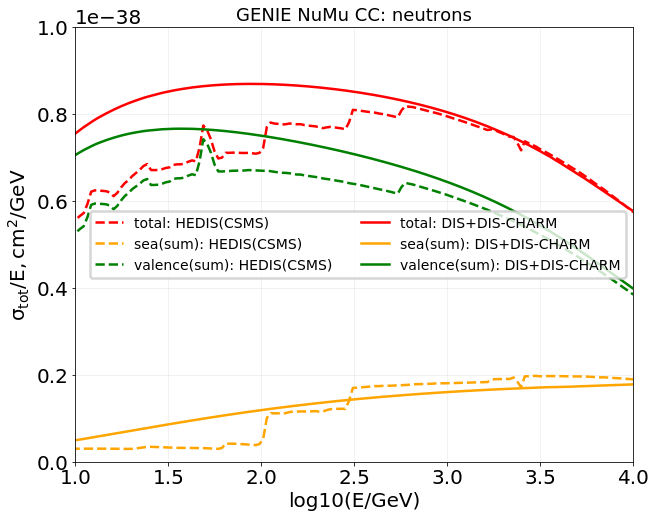

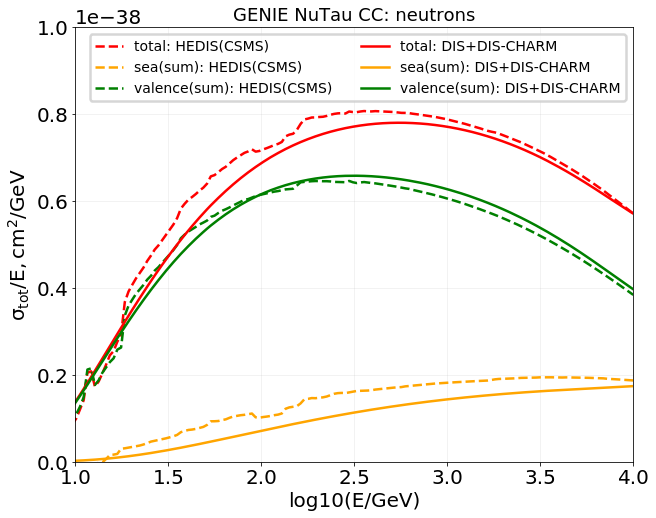

0

In [228]:
plot_both(hedis_fname=hedis_csms,
          v2_fname=g2_file,
          pdg=12, hitN=2112, CC=1)

plot_both(hedis_fname=hedis_csms,
          v2_fname=g2_file,
          pdg=14, hitN=2112, CC=1)

plot_both(hedis_fname=hedis_csms,
          v2_fname=g2_file,
          pdg=16, hitN=2112, CC=1)

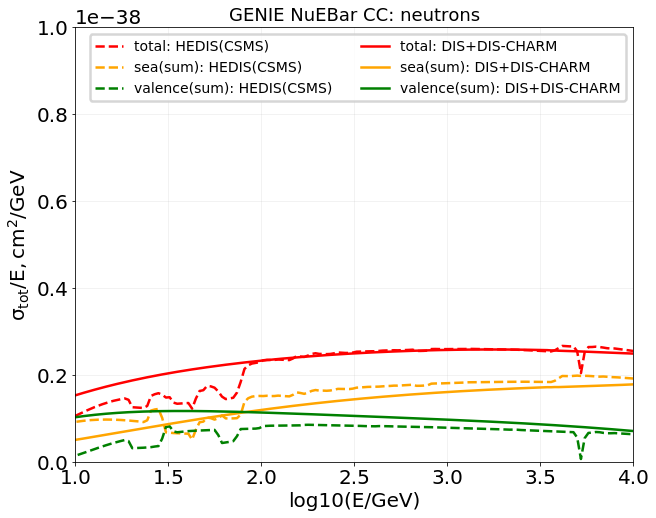

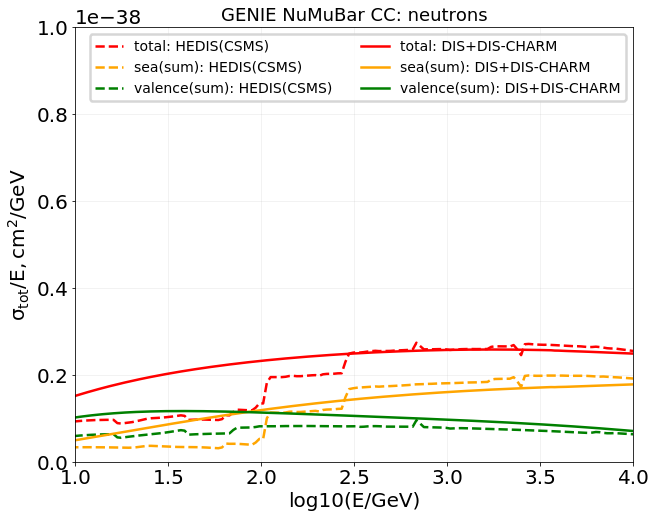

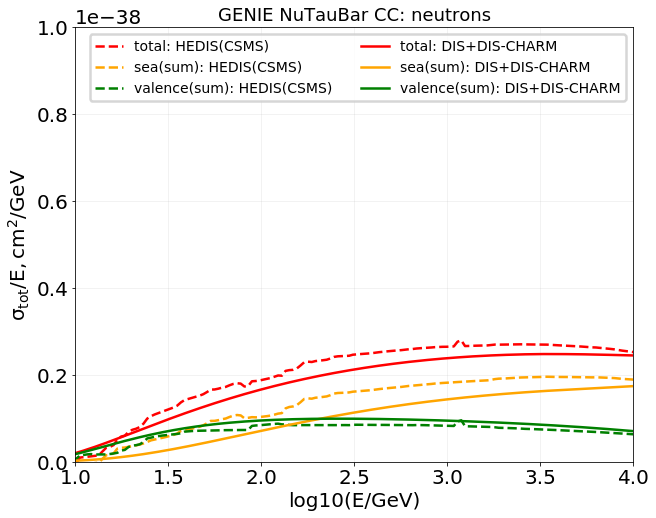

0

In [229]:
plot_both(hedis_fname=hedis_csms,
          v2_fname=g2_file,
          pdg=-12, hitN=2112, CC=1)

plot_both(hedis_fname=hedis_csms,
          v2_fname=g2_file,
          pdg=-14, hitN=2112, CC=1)

plot_both(hedis_fname=hedis_csms,
          v2_fname=g2_file,
          pdg=-16, hitN=2112, CC=1)

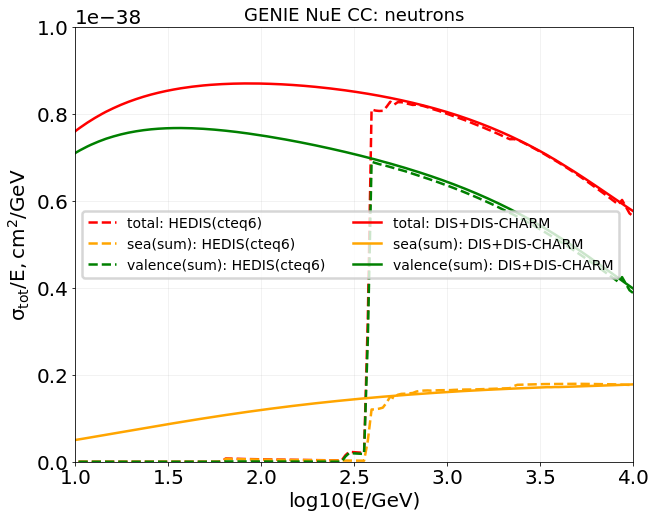

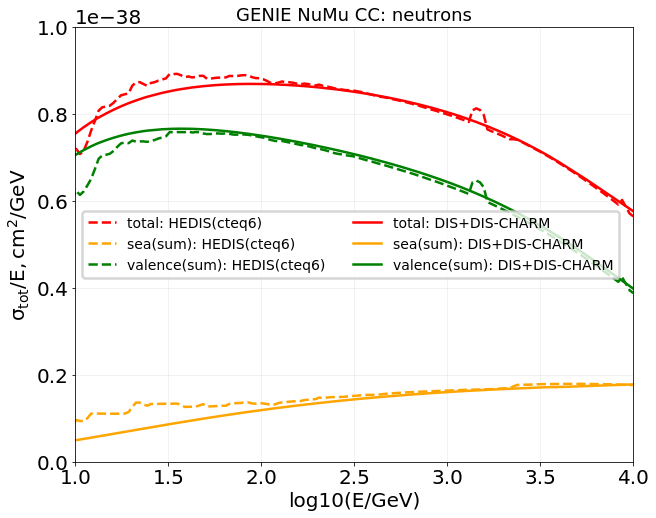

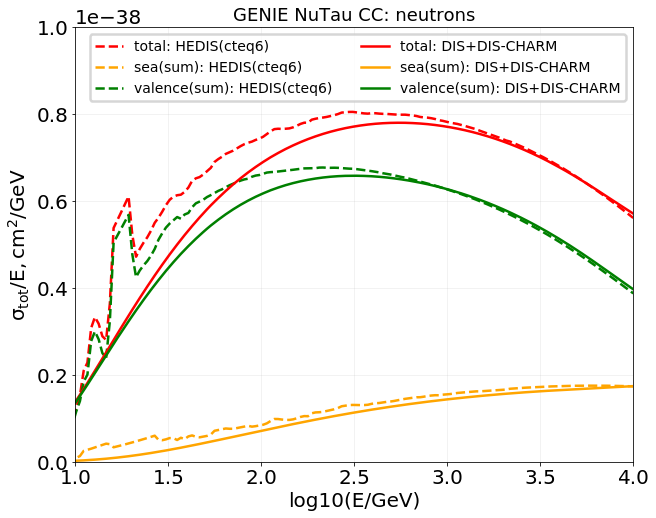

0

In [230]:
plot_both(hedis_fname=hedis_km3net,
          v2_fname=g2_file,
          pdg=12, hitN=2112, CC=1, hedis_model='cteq6')

plot_both(hedis_fname=hedis_km3net,
          v2_fname=g2_file,
          pdg=14, hitN=2112, CC=1, hedis_model='cteq6')

plot_both(hedis_fname=hedis_km3net,
          v2_fname=g2_file,
          pdg=16, hitN=2112, CC=1, hedis_model='cteq6')

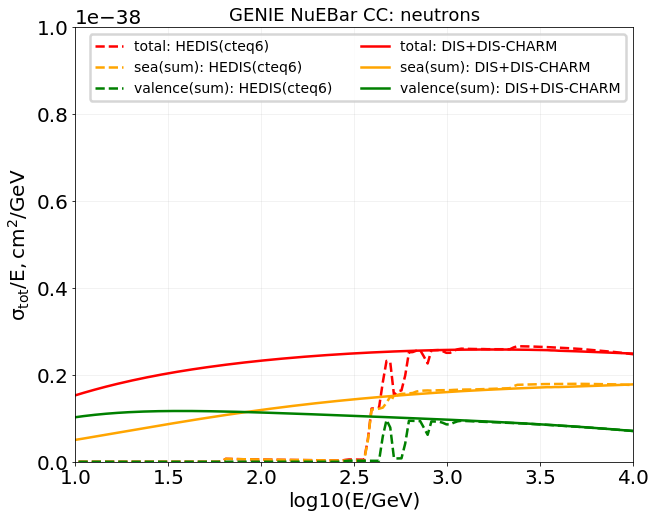

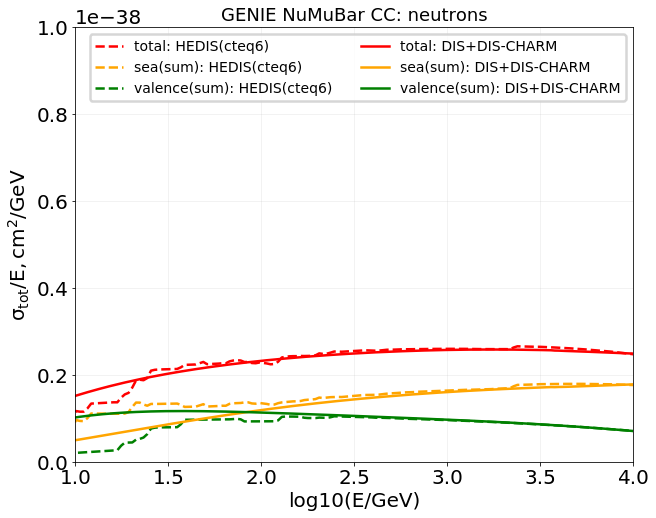

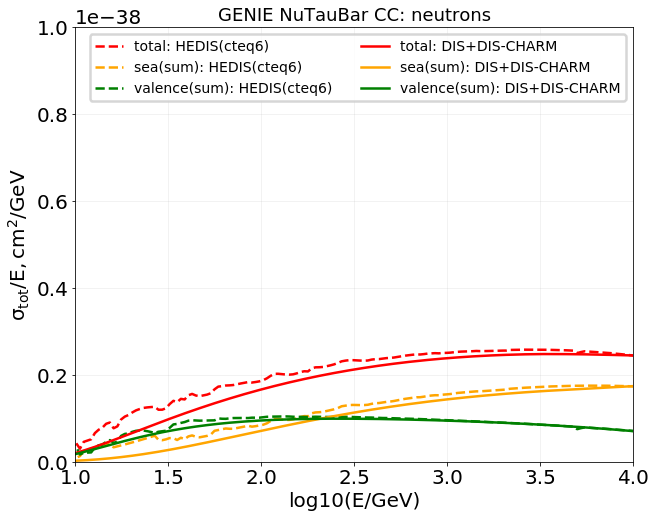

0

In [231]:
plot_both(hedis_fname=hedis_km3net,
          v2_fname=g2_file,
          pdg=-12, hitN=2112, CC=1, hedis_model='cteq6')

plot_both(hedis_fname=hedis_km3net,
          v2_fname=g2_file,
          pdg=-14, hitN=2112, CC=1, hedis_model='cteq6')

plot_both(hedis_fname=hedis_km3net,
          v2_fname=g2_file,
          pdg=-16, hitN=2112, CC=1, hedis_model='cteq6')